# Credit Card Transactions Fraud Detection
   https://www.kaggle.com/datasets/kartik2112/fraud-detection

## Proplem statement

 #### There is many transaction made everyday a many of them are made by fraud so in our project we gonna go through and show the              parameters that can predict the fraud and its transaction

#### BUSSINESS GOAL 
##### Banks are from the most importnant thing we used everday , and fraud detection is a dangerous process so its important to predict this                 process befor it happen so it gonna save a millions of money also the secuirty for the  banks.

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
from datetime import time
from geopy.distance import great_circle
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt
from scipy.stats import norm
import joblib
%matplotlib inline

### Step 1: Reading and Understanding the Data

Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

In [2]:
df1=pd.read_csv('fraud copy.csv')
df1

Unnamed: 0 trans_date_trans_time               cc_num  \
0                0   2020-06-21 12:14:25     2291163933867244   
1                1   2020-06-21 12:14:33     3573030041201292   
2                2   2020-06-21 12:14:53     3598215285024754   
3                3   2020-06-21 12:15:15     3591919803438423   
4                4   2020-06-21 12:15:17     3526826139003047   
5                5   2020-06-21 12:15:37       30407675418785   
6                6   2020-06-21 12:15:44      213180742685905   
7                7   2020-06-21 12:15:50     3589289942931264   
8                8   2020-06-21 12:16:10     3596357274378601   
9                9   2020-06-21 12:16:11     3546897637165774   
10              10   2020-06-21 12:16:20     2242542703101233   
11              11   2020-06-21 12:16:47         571465035400   
12              12   2020-06-21 12:17:21     6593250708747804   
13              13   2020-06-21 12:18:27        4988304376504   
14              14   2020-06-21 12:18:37     6011504998544485   
15              15   2020-06-21 12:18:41     4570636521433188   
16              16   2020-06-21 12:18:54  4906628655840914250   
17              17   2020-06-21 12:19:50     4908846471916297   
18              18   2020-06-21 12:19:56  4861310130652566408   
19              19   2020-06-21 12:20:13     6538441737335434   
20              20   2020-06-21 12:20:34     2283743876903625   
21              21   2020-06-21 12:20:42  4560004149983868183   
22              22   2020-06-21 12:20:57        4562827002127   
23              23   2020-06-21 12:21:46      213153151785052   
24              24   2020-06-21 12:21:47      372509258176510   
25              25   2020-06-21 12:23:08     6011148190095209   
26              26   2020-06-21 12:23:09     6011917798331152   
27              27   2020-06-21 12:23:53     3577663406369449   
28              28   2020-06-21 12:24:11     3502377050801561   
29              29   2020-06-21 12:24:16      180040027502291   
...            ...                   ...                  ...   
555689      555689   2020-12-31 23:48:28     5540636818935089   
555690      555690   2020-12-31 23:48:49     2222001896600109   
555691      555691   2020-12-31 23:48:53     2291163933867244   
555692      555692   2020-12-31 23:49:22     2252055259910912   
555693      555693   2020-12-31 23:49:26        4806443445305   
555694      555694   2020-12-31 23:50:17     4229733778084049   
555695      555695   2020-12-31 23:50:34      371226440126102   
555696      555696   2020-12-31 23:50:45     3568255211412877   
555697      555697   2020-12-31 23:50:51       30404291151692   
555698      555698   2020-12-31 23:50:55     4922710831011201   
555699      555699   2020-12-31 23:51:07       30197398657930   
555700      555700   2020-12-31 23:51:42     4610050989831291   
555701      555701   2020-12-31 23:52:18     3517814635263522   
555702      555702   2020-12-31 23:53:00     2252055259910912   
555703      555703   2020-12-31 23:53:18     4841313716651064   
555704      555704   2020-12-31 23:54:12     3518669219150142   
555705      555705   2020-12-31 23:54:15  4319584480204988982   
555706      555706   2020-12-31 23:55:47      213155997615567   
555707      555707   2020-12-31 23:56:48     6011109736646996   
555708      555708   2020-12-31 23:56:57      213112402583773   
555709      555709   2020-12-31 23:57:18       30344654314976   
555710      555710   2020-12-31 23:57:50     3524574586339330   
555711      555711   2020-12-31 23:57:56      341546199006537   
555712      555712   2020-12-31 23:58:04         501802953619   
555713      555713   2020-12-31 23:58:34     3523843138706408   
555714      555714   2020-12-31 23:59:07       30560609640617   
555715      555715   2020-12-31 23:59:09     3556613125071656   
555716      555716   2020-12-31 23:59:15     6011724471098086   
555717      555717   2020-12-31 23:59:24        4079773899158   
555718      555718   2020-12-31 23:59:34   

In [3]:
df2=pd.read_csv('fraudTrain.csv')
df2

Unnamed: 0 trans_date_trans_time               cc_num  \
0                 0   2019-01-01 00:00:18     2703186189652095   
1                 1   2019-01-01 00:00:44         630423337322   
2                 2   2019-01-01 00:00:51       38859492057661   
3                 3   2019-01-01 00:01:16     3534093764340240   
4                 4   2019-01-01 00:03:06      375534208663984   
5                 5   2019-01-01 00:04:08     4767265376804500   
6                 6   2019-01-01 00:04:42       30074693890476   
7                 7   2019-01-01 00:05:08     6011360759745864   
8                 8   2019-01-01 00:05:18     4922710831011201   
9                 9   2019-01-01 00:06:01     2720830304681674   
10               10   2019-01-01 00:06:23        4642894980163   
11               11   2019-01-01 00:06:53      377234009633447   
12               12   2019-01-01 00:06:56      180042946491150   
13               13   2019-01-01 00:07:27     5559857416065248   
14               14   2019-01-01 00:09:03     3514865930894695   
15               15   2019-01-01 00:09:20     6011999606625827   
16               16   2019-01-01 00:10:49     6011860238257910   
17               17   2019-01-01 00:10:58     3565423334076143   
18               18   2019-01-01 00:11:14     2348245054386329   
19               19   2019-01-01 00:12:34  4956828990005111019   
20               20   2019-01-01 00:13:08  4469777115158234880   
21               21   2019-01-01 00:14:37     2305336922781618   
22               22   2019-01-01 00:17:16      180048185037117   
23               23   2019-01-01 00:17:40         630441765090   
24               24   2019-01-01 00:18:06  4428780983793657331   
25               25   2019-01-01 00:18:07      343464013864032   
26               26   2019-01-01 00:20:15      374930071163758   
27               27   2019-01-01 00:21:32     4334230547694630   
28               28   2019-01-01 00:22:06  4225990116481262579   
29               29   2019-01-01 00:22:18     4260059589824237   
...             ...                   ...                  ...   
1296645     1296645   2020-06-21 12:01:35        4260128500325   
1296646     1296646   2020-06-21 12:02:13     5359543825610251   
1296647     1296647   2020-06-21 12:02:27  4710826438164847414   
1296648     1296648   2020-06-21 12:02:44     3511378610369890   
1296649     1296649   2020-06-21 12:02:57       30234966027947   
1296650     1296650   2020-06-21 12:02:59     6538891242532018   
1296651     1296651   2020-06-21 12:03:37     6534628260579800   
1296652     1296652   2020-06-21 12:04:53       36485887555770   
1296653     1296653   2020-06-21 12:06:04     4377338765909719   
1296654     1296654   2020-06-21 12:06:12     4904681492230012   
1296655     1296655   2020-06-21 12:06:23     3546897637165774   
1296656     1296656   2020-06-21 12:07:09     4158945090781624   
1296657     1296657   2020-06-21 12:07:20        4464457352619   
1296658     1296658   2020-06-21 12:07:47     4302480582202074   
1296659     1296659   2020-06-21 12:07:53      213112402583773   
1296660     1296660   2020-06-21 12:07:54  4040099974063068803   
1296661     1296661   2020-06-21 12:08:08     3586955669388457   
1296662     1296662   2020-06-21 12:08:13      346273234529002   
1296663     1296663   2020-06-21 12:08:32     4335531783520911   
1296664     1296664   2020-06-21 12:08:36     3531129874770000   
1296665     1296665   2020-06-21 12:08:42      213193596103206   
1296666     1296666   2020-06-21 12:09:22  4587657402165341815   
1296667     1296667   2020-06-21 12:10:56     4822367783500458   
1296668     1296668   2020-06-21 12:11:23      213141712584544   
1296669     1296669   2020-06-21 12:11:36  4400011257587661852   
1296670     1296670   2020-06-21 12:12:08       30263540414123   
1296671     1296671   2020-06-21 12:12:19     6011149206456997   
1296672     1296672   2020-06-21 12:12:32     3514865930894695   
1296673     1296673   2020-06-21 12:13:36     272

In [88]:
df=pd.concat([df1, df2], axis=0)
df

Unnamed: 0 trans_date_trans_time               cc_num  \
0                 0   2020-06-21 12:14:25     2291163933867244   
1                 1   2020-06-21 12:14:33     3573030041201292   
2                 2   2020-06-21 12:14:53     3598215285024754   
3                 3   2020-06-21 12:15:15     3591919803438423   
4                 4   2020-06-21 12:15:17     3526826139003047   
5                 5   2020-06-21 12:15:37       30407675418785   
6                 6   2020-06-21 12:15:44      213180742685905   
7                 7   2020-06-21 12:15:50     3589289942931264   
8                 8   2020-06-21 12:16:10     3596357274378601   
9                 9   2020-06-21 12:16:11     3546897637165774   
10               10   2020-06-21 12:16:20     2242542703101233   
11               11   2020-06-21 12:16:47         571465035400   
12               12   2020-06-21 12:17:21     6593250708747804   
13               13   2020-06-21 12:18:27        4988304376504   
14               14   2020-06-21 12:18:37     6011504998544485   
15               15   2020-06-21 12:18:41     4570636521433188   
16               16   2020-06-21 12:18:54  4906628655840914250   
17               17   2020-06-21 12:19:50     4908846471916297   
18               18   2020-06-21 12:19:56  4861310130652566408   
19               19   2020-06-21 12:20:13     6538441737335434   
20               20   2020-06-21 12:20:34     2283743876903625   
21               21   2020-06-21 12:20:42  4560004149983868183   
22               22   2020-06-21 12:20:57        4562827002127   
23               23   2020-06-21 12:21:46      213153151785052   
24               24   2020-06-21 12:21:47      372509258176510   
25               25   2020-06-21 12:23:08     6011148190095209   
26               26   2020-06-21 12:23:09     6011917798331152   
27               27   2020-06-21 12:23:53     3577663406369449   
28               28   2020-06-21 12:24:11     3502377050801561   
29               29   2020-06-21 12:24:16      180040027502291   
...             ...                   ...                  ...   
1296645     1296645   2020-06-21 12:01:35        4260128500325   
1296646     1296646   2020-06-21 12:02:13     5359543825610251   
1296647     1296647   2020-06-21 12:02:27  4710826438164847414   
1296648     1296648   2020-06-21 12:02:44     3511378610369890   
1296649     1296649   2020-06-21 12:02:57       30234966027947   
1296650     1296650   2020-06-21 12:02:59     6538891242532018   
1296651     1296651   2020-06-21 12:03:37     6534628260579800   
1296652     1296652   2020-06-21 12:04:53       36485887555770   
1296653     1296653   2020-06-21 12:06:04     4377338765909719   
1296654     1296654   2020-06-21 12:06:12     4904681492230012   
1296655     1296655   2020-06-21 12:06:23     3546897637165774   
1296656     1296656   2020-06-21 12:07:09     4158945090781624   
1296657     1296657   2020-06-21 12:07:20        4464457352619   
1296658     1296658   2020-06-21 12:07:47     4302480582202074   
1296659     1296659   2020-06-21 12:07:53      213112402583773   
1296660     1296660   2020-06-21 12:07:54  4040099974063068803   
1296661     1296661   2020-06-21 12:08:08     3586955669388457   
1296662     1296662   2020-06-21 12:08:13      346273234529002   
1296663     1296663   2020-06-21 12:08:32     4335531783520911   
1296664     1296664   2020-06-21 12:08:36     3531129874770000   
1296665     1296665   2020-06-21 12:08:42      213193596103206   
1296666     1296666   2020-06-21 12:09:22  4587657402165341815   
1296667     1296667   2020-06-21 12:10:56     4822367783500458   
1296668     1296668   2020-06-21 12:11:23      213141712584544   
1296669     1296669   2020-06-21 12:11:36  4400011257587661852   
1296670     1296670   2020-06-21 12:12:08       30263540414123   
1296671     1296671   2020-06-21 12:12:19     6011149206456997   
1296672     1296672   2020-06-21 12:12:32     3514865930894695   
1296673     1296673   2020-06-21 12:13:36     272

In [5]:
list(df.columns)

['Unnamed: 0',
 'trans_date_trans_time',
 'cc_num',
 'merchant',
 'category',
 'amt',
 'first',
 'last',
 'gender',
 'street',
 'city',
 'state',
 'zip',
 'lat',
 'long',
 'city_pop',
 'job',
 'dob',
 'trans_num',
 'unix_time',
 'merch_lat',
 'merch_long',
 'is_fraud']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 1296674
Data columns (total 23 columns):
Unnamed: 0               int64
trans_date_trans_time    object
cc_num                   int64
merchant                 object
category                 object
amt                      float64
first                    object
last                     object
gender                   object
street                   object
city                     object
state                    object
zip                      int64
lat                      float64
long                     float64
city_pop                 int64
job                      object
dob                      object
trans_num                object
unix_time                int64
merch_lat                float64
merch_long               float64
is_fraud                 int64
dtypes: float64(5), int64(6), object(12)
memory usage: 339.2+ MB


# Step 2 : Data Cleaning  , Preparation and Feature engineering 

In [7]:
df['trans_date_trans_time']=pd.to_datetime(df['trans_date_trans_time'])

In [8]:
df['trans_date_trans_time'].dt.hour.unique()

array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,  0,  1,  2,  3,  4,
        5,  6,  7,  8,  9, 10, 11])

In [9]:
df['Hour_of_transaction']=pd.to_datetime(df['trans_date_trans_time']).dt.hour

In [10]:
df['Day_of_transaction']=pd.to_datetime(df['trans_date_trans_time']).dt.day

In [11]:
df['Month_of_transaction']=pd.to_datetime(df['trans_date_trans_time']).dt.month 

In [12]:
df

Unnamed: 0 trans_date_trans_time               cc_num  \
0                 0   2020-06-21 12:14:25     2291163933867244   
1                 1   2020-06-21 12:14:33     3573030041201292   
2                 2   2020-06-21 12:14:53     3598215285024754   
3                 3   2020-06-21 12:15:15     3591919803438423   
4                 4   2020-06-21 12:15:17     3526826139003047   
5                 5   2020-06-21 12:15:37       30407675418785   
6                 6   2020-06-21 12:15:44      213180742685905   
7                 7   2020-06-21 12:15:50     3589289942931264   
8                 8   2020-06-21 12:16:10     3596357274378601   
9                 9   2020-06-21 12:16:11     3546897637165774   
10               10   2020-06-21 12:16:20     2242542703101233   
11               11   2020-06-21 12:16:47         571465035400   
12               12   2020-06-21 12:17:21     6593250708747804   
13               13   2020-06-21 12:18:27        4988304376504   
14               14   2020-06-21 12:18:37     6011504998544485   
15               15   2020-06-21 12:18:41     4570636521433188   
16               16   2020-06-21 12:18:54  4906628655840914250   
17               17   2020-06-21 12:19:50     4908846471916297   
18               18   2020-06-21 12:19:56  4861310130652566408   
19               19   2020-06-21 12:20:13     6538441737335434   
20               20   2020-06-21 12:20:34     2283743876903625   
21               21   2020-06-21 12:20:42  4560004149983868183   
22               22   2020-06-21 12:20:57        4562827002127   
23               23   2020-06-21 12:21:46      213153151785052   
24               24   2020-06-21 12:21:47      372509258176510   
25               25   2020-06-21 12:23:08     6011148190095209   
26               26   2020-06-21 12:23:09     6011917798331152   
27               27   2020-06-21 12:23:53     3577663406369449   
28               28   2020-06-21 12:24:11     3502377050801561   
29               29   2020-06-21 12:24:16      180040027502291   
...             ...                   ...                  ...   
1296645     1296645   2020-06-21 12:01:35        4260128500325   
1296646     1296646   2020-06-21 12:02:13     5359543825610251   
1296647     1296647   2020-06-21 12:02:27  4710826438164847414   
1296648     1296648   2020-06-21 12:02:44     3511378610369890   
1296649     1296649   2020-06-21 12:02:57       30234966027947   
1296650     1296650   2020-06-21 12:02:59     6538891242532018   
1296651     1296651   2020-06-21 12:03:37     6534628260579800   
1296652     1296652   2020-06-21 12:04:53       36485887555770   
1296653     1296653   2020-06-21 12:06:04     4377338765909719   
1296654     1296654   2020-06-21 12:06:12     4904681492230012   
1296655     1296655   2020-06-21 12:06:23     3546897637165774   
1296656     1296656   2020-06-21 12:07:09     4158945090781624   
1296657     1296657   2020-06-21 12:07:20        4464457352619   
1296658     1296658   2020-06-21 12:07:47     4302480582202074   
1296659     1296659   2020-06-21 12:07:53      213112402583773   
1296660     1296660   2020-06-21 12:07:54  4040099974063068803   
1296661     1296661   2020-06-21 12:08:08     3586955669388457   
1296662     1296662   2020-06-21 12:08:13      346273234529002   
1296663     1296663   2020-06-21 12:08:32     4335531783520911   
1296664     1296664   2020-06-21 12:08:36     3531129874770000   
1296665     1296665   2020-06-21 12:08:42      213193596103206   
1296666     1296666   2020-06-21 12:09:22  4587657402165341815   
1296667     1296667   2020-06-21 12:10:56     4822367783500458   
1296668     1296668   2020-06-21 12:11:23      213141712584544   
1296669     1296669   2020-06-21 12:11:36  4400011257587661852   
1296670     1296670   2020-06-21 12:12:08       30263540414123   
1296671     1296671   2020-06-21 12:12:19     6011149206456997   
1296672     1296672   2020-06-21 12:12:32     3514865930894695   
1296673     1296673   2020-06-21 12:13:36     272

In [13]:
df['dob']=pd.to_datetime(df['dob'])

In [14]:
def Merchant (name):
    return name[6:]
df['merchant']=df['merchant'].apply(Merchant)

In [15]:
df['merchant'].iloc[0]

'Kirlin and Sons'

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 1296674
Data columns (total 26 columns):
Unnamed: 0               int64
trans_date_trans_time    datetime64[ns]
cc_num                   int64
merchant                 object
category                 object
amt                      float64
first                    object
last                     object
gender                   object
street                   object
city                     object
state                    object
zip                      int64
lat                      float64
long                     float64
city_pop                 int64
job                      object
dob                      datetime64[ns]
trans_num                object
unix_time                int64
merch_lat                float64
merch_long               float64
is_fraud                 int64
Hour_of_transaction      int64
Day_of_transaction       int64
Month_of_transaction     int64
dtypes: datetime64[ns](2), float64(5), int6

In [17]:
df

Unnamed: 0 trans_date_trans_time               cc_num  \
0                 0   2020-06-21 12:14:25     2291163933867244   
1                 1   2020-06-21 12:14:33     3573030041201292   
2                 2   2020-06-21 12:14:53     3598215285024754   
3                 3   2020-06-21 12:15:15     3591919803438423   
4                 4   2020-06-21 12:15:17     3526826139003047   
5                 5   2020-06-21 12:15:37       30407675418785   
6                 6   2020-06-21 12:15:44      213180742685905   
7                 7   2020-06-21 12:15:50     3589289942931264   
8                 8   2020-06-21 12:16:10     3596357274378601   
9                 9   2020-06-21 12:16:11     3546897637165774   
10               10   2020-06-21 12:16:20     2242542703101233   
11               11   2020-06-21 12:16:47         571465035400   
12               12   2020-06-21 12:17:21     6593250708747804   
13               13   2020-06-21 12:18:27        4988304376504   
14               14   2020-06-21 12:18:37     6011504998544485   
15               15   2020-06-21 12:18:41     4570636521433188   
16               16   2020-06-21 12:18:54  4906628655840914250   
17               17   2020-06-21 12:19:50     4908846471916297   
18               18   2020-06-21 12:19:56  4861310130652566408   
19               19   2020-06-21 12:20:13     6538441737335434   
20               20   2020-06-21 12:20:34     2283743876903625   
21               21   2020-06-21 12:20:42  4560004149983868183   
22               22   2020-06-21 12:20:57        4562827002127   
23               23   2020-06-21 12:21:46      213153151785052   
24               24   2020-06-21 12:21:47      372509258176510   
25               25   2020-06-21 12:23:08     6011148190095209   
26               26   2020-06-21 12:23:09     6011917798331152   
27               27   2020-06-21 12:23:53     3577663406369449   
28               28   2020-06-21 12:24:11     3502377050801561   
29               29   2020-06-21 12:24:16      180040027502291   
...             ...                   ...                  ...   
1296645     1296645   2020-06-21 12:01:35        4260128500325   
1296646     1296646   2020-06-21 12:02:13     5359543825610251   
1296647     1296647   2020-06-21 12:02:27  4710826438164847414   
1296648     1296648   2020-06-21 12:02:44     3511378610369890   
1296649     1296649   2020-06-21 12:02:57       30234966027947   
1296650     1296650   2020-06-21 12:02:59     6538891242532018   
1296651     1296651   2020-06-21 12:03:37     6534628260579800   
1296652     1296652   2020-06-21 12:04:53       36485887555770   
1296653     1296653   2020-06-21 12:06:04     4377338765909719   
1296654     1296654   2020-06-21 12:06:12     4904681492230012   
1296655     1296655   2020-06-21 12:06:23     3546897637165774   
1296656     1296656   2020-06-21 12:07:09     4158945090781624   
1296657     1296657   2020-06-21 12:07:20        4464457352619   
1296658     1296658   2020-06-21 12:07:47     4302480582202074   
1296659     1296659   2020-06-21 12:07:53      213112402583773   
1296660     1296660   2020-06-21 12:07:54  4040099974063068803   
1296661     1296661   2020-06-21 12:08:08     3586955669388457   
1296662     1296662   2020-06-21 12:08:13      346273234529002   
1296663     1296663   2020-06-21 12:08:32     4335531783520911   
1296664     1296664   2020-06-21 12:08:36     3531129874770000   
1296665     1296665   2020-06-21 12:08:42      213193596103206   
1296666     1296666   2020-06-21 12:09:22  4587657402165341815   
1296667     1296667   2020-06-21 12:10:56     4822367783500458   
1296668     1296668   2020-06-21 12:11:23      213141712584544   
1296669     1296669   2020-06-21 12:11:36  4400011257587661852   
1296670     1296670   2020-06-21 12:12:08       30263540414123   
1296671     1296671   2020-06-21 12:12:19     6011149206456997   
1296672     1296672   2020-06-21 12:12:32     3514865930894695   
1296673     1296673   2020-06-21 12:13:36     272

In [18]:
df['Full Name']=df['first']+' '+df['last']

In [19]:
df

Unnamed: 0 trans_date_trans_time               cc_num  \
0                 0   2020-06-21 12:14:25     2291163933867244   
1                 1   2020-06-21 12:14:33     3573030041201292   
2                 2   2020-06-21 12:14:53     3598215285024754   
3                 3   2020-06-21 12:15:15     3591919803438423   
4                 4   2020-06-21 12:15:17     3526826139003047   
5                 5   2020-06-21 12:15:37       30407675418785   
6                 6   2020-06-21 12:15:44      213180742685905   
7                 7   2020-06-21 12:15:50     3589289942931264   
8                 8   2020-06-21 12:16:10     3596357274378601   
9                 9   2020-06-21 12:16:11     3546897637165774   
10               10   2020-06-21 12:16:20     2242542703101233   
11               11   2020-06-21 12:16:47         571465035400   
12               12   2020-06-21 12:17:21     6593250708747804   
13               13   2020-06-21 12:18:27        4988304376504   
14               14   2020-06-21 12:18:37     6011504998544485   
15               15   2020-06-21 12:18:41     4570636521433188   
16               16   2020-06-21 12:18:54  4906628655840914250   
17               17   2020-06-21 12:19:50     4908846471916297   
18               18   2020-06-21 12:19:56  4861310130652566408   
19               19   2020-06-21 12:20:13     6538441737335434   
20               20   2020-06-21 12:20:34     2283743876903625   
21               21   2020-06-21 12:20:42  4560004149983868183   
22               22   2020-06-21 12:20:57        4562827002127   
23               23   2020-06-21 12:21:46      213153151785052   
24               24   2020-06-21 12:21:47      372509258176510   
25               25   2020-06-21 12:23:08     6011148190095209   
26               26   2020-06-21 12:23:09     6011917798331152   
27               27   2020-06-21 12:23:53     3577663406369449   
28               28   2020-06-21 12:24:11     3502377050801561   
29               29   2020-06-21 12:24:16      180040027502291   
...             ...                   ...                  ...   
1296645     1296645   2020-06-21 12:01:35        4260128500325   
1296646     1296646   2020-06-21 12:02:13     5359543825610251   
1296647     1296647   2020-06-21 12:02:27  4710826438164847414   
1296648     1296648   2020-06-21 12:02:44     3511378610369890   
1296649     1296649   2020-06-21 12:02:57       30234966027947   
1296650     1296650   2020-06-21 12:02:59     6538891242532018   
1296651     1296651   2020-06-21 12:03:37     6534628260579800   
1296652     1296652   2020-06-21 12:04:53       36485887555770   
1296653     1296653   2020-06-21 12:06:04     4377338765909719   
1296654     1296654   2020-06-21 12:06:12     4904681492230012   
1296655     1296655   2020-06-21 12:06:23     3546897637165774   
1296656     1296656   2020-06-21 12:07:09     4158945090781624   
1296657     1296657   2020-06-21 12:07:20        4464457352619   
1296658     1296658   2020-06-21 12:07:47     4302480582202074   
1296659     1296659   2020-06-21 12:07:53      213112402583773   
1296660     1296660   2020-06-21 12:07:54  4040099974063068803   
1296661     1296661   2020-06-21 12:08:08     3586955669388457   
1296662     1296662   2020-06-21 12:08:13      346273234529002   
1296663     1296663   2020-06-21 12:08:32     4335531783520911   
1296664     1296664   2020-06-21 12:08:36     3531129874770000   
1296665     1296665   2020-06-21 12:08:42      213193596103206   
1296666     1296666   2020-06-21 12:09:22  4587657402165341815   
1296667     1296667   2020-06-21 12:10:56     4822367783500458   
1296668     1296668   2020-06-21 12:11:23      213141712584544   
1296669     1296669   2020-06-21 12:11:36  4400011257587661852   
1296670     1296670   2020-06-21 12:12:08       30263540414123   
1296671     1296671   2020-06-21 12:12:19     6011149206456997   
1296672     1296672   2020-06-21 12:12:32     3514865930894695   
1296673     1296673   2020-06-21 12:13:36     272

In [20]:
df.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
Hour_of_transaction      0
Day_of_transaction       0
Month_of_transaction     0
Full Name                0
dtype: int64

In [21]:
def get_distance(raw):
    Merchant_loc= (raw['merch_lat'],raw['merch_long'])
    Home_loc= (raw['lat'],raw['long'])
    return great_circle (Merchant_loc,Home_loc).kilometers


In [22]:
df['Distance']=df.apply(get_distance , axis=1)

In [23]:
df

Unnamed: 0 trans_date_trans_time               cc_num  \
0                 0   2020-06-21 12:14:25     2291163933867244   
1                 1   2020-06-21 12:14:33     3573030041201292   
2                 2   2020-06-21 12:14:53     3598215285024754   
3                 3   2020-06-21 12:15:15     3591919803438423   
4                 4   2020-06-21 12:15:17     3526826139003047   
5                 5   2020-06-21 12:15:37       30407675418785   
6                 6   2020-06-21 12:15:44      213180742685905   
7                 7   2020-06-21 12:15:50     3589289942931264   
8                 8   2020-06-21 12:16:10     3596357274378601   
9                 9   2020-06-21 12:16:11     3546897637165774   
10               10   2020-06-21 12:16:20     2242542703101233   
11               11   2020-06-21 12:16:47         571465035400   
12               12   2020-06-21 12:17:21     6593250708747804   
13               13   2020-06-21 12:18:27        4988304376504   
14               14   2020-06-21 12:18:37     6011504998544485   
15               15   2020-06-21 12:18:41     4570636521433188   
16               16   2020-06-21 12:18:54  4906628655840914250   
17               17   2020-06-21 12:19:50     4908846471916297   
18               18   2020-06-21 12:19:56  4861310130652566408   
19               19   2020-06-21 12:20:13     6538441737335434   
20               20   2020-06-21 12:20:34     2283743876903625   
21               21   2020-06-21 12:20:42  4560004149983868183   
22               22   2020-06-21 12:20:57        4562827002127   
23               23   2020-06-21 12:21:46      213153151785052   
24               24   2020-06-21 12:21:47      372509258176510   
25               25   2020-06-21 12:23:08     6011148190095209   
26               26   2020-06-21 12:23:09     6011917798331152   
27               27   2020-06-21 12:23:53     3577663406369449   
28               28   2020-06-21 12:24:11     3502377050801561   
29               29   2020-06-21 12:24:16      180040027502291   
...             ...                   ...                  ...   
1296645     1296645   2020-06-21 12:01:35        4260128500325   
1296646     1296646   2020-06-21 12:02:13     5359543825610251   
1296647     1296647   2020-06-21 12:02:27  4710826438164847414   
1296648     1296648   2020-06-21 12:02:44     3511378610369890   
1296649     1296649   2020-06-21 12:02:57       30234966027947   
1296650     1296650   2020-06-21 12:02:59     6538891242532018   
1296651     1296651   2020-06-21 12:03:37     6534628260579800   
1296652     1296652   2020-06-21 12:04:53       36485887555770   
1296653     1296653   2020-06-21 12:06:04     4377338765909719   
1296654     1296654   2020-06-21 12:06:12     4904681492230012   
1296655     1296655   2020-06-21 12:06:23     3546897637165774   
1296656     1296656   2020-06-21 12:07:09     4158945090781624   
1296657     1296657   2020-06-21 12:07:20        4464457352619   
1296658     1296658   2020-06-21 12:07:47     4302480582202074   
1296659     1296659   2020-06-21 12:07:53      213112402583773   
1296660     1296660   2020-06-21 12:07:54  4040099974063068803   
1296661     1296661   2020-06-21 12:08:08     3586955669388457   
1296662     1296662   2020-06-21 12:08:13      346273234529002   
1296663     1296663   2020-06-21 12:08:32     4335531783520911   
1296664     1296664   2020-06-21 12:08:36     3531129874770000   
1296665     1296665   2020-06-21 12:08:42      213193596103206   
1296666     1296666   2020-06-21 12:09:22  4587657402165341815   
1296667     1296667   2020-06-21 12:10:56     4822367783500458   
1296668     1296668   2020-06-21 12:11:23      213141712584544   
1296669     1296669   2020-06-21 12:11:36  4400011257587661852   
1296670     1296670   2020-06-21 12:12:08       30263540414123   
1296671     1296671   2020-06-21 12:12:19     6011149206456997   
1296672     1296672   2020-06-21 12:12:32     3514865930894695   
1296673     1296673   2020-06-21 12:13:36     272

In [24]:
Merchant_loc= (36.011293,82.048315)
Home_loc= (36.0788,-81.1781)
great_circle (Merchant_loc,Home_loc).kilometers

11813.657252908923

In [25]:
df[['lat','long']]

lat      long
0        33.9659  -80.9355
1        40.3207 -110.4360
2        40.6729  -73.5365
3        28.5697  -80.8191
4        44.2529  -85.0170
5        42.1939  -76.7361
6        40.5070 -123.9743
7        43.7557  -97.5936
8        41.0001  -78.2357
9        31.6591  -96.8094
10       38.4921  -85.4524
11       43.0048 -108.8964
12       26.7383  -80.2760
13       41.4575  -74.1659
14       32.5104  -86.8138
15       28.8989  -81.2473
16       24.6557  -81.3824
17       32.2779  -97.2351
18       30.2385  -90.8435
19       41.3851  -80.1752
20       34.0770  -84.3033
21       38.8881 -104.6556
22       40.0987  -84.6342
23       45.4963  -89.7273
24       42.9147  -83.4845
25       37.6787 -122.4780
26       43.1699  -72.8515
27       35.6069  -90.3359
28       30.5354  -95.4532
29       40.7699  -73.9511
...          ...       ...
1296645  37.2409  -82.7696
1296646  45.7801 -111.1439
1296647  48.8328 -108.3961
1296648  34.7789  -86.5438
1296649  43.9446  -88.0911
1296650  36.0244  -90.9288
1296651  44.3346  -73.0980
1296652  40.4971  -82.8342
1296653  36.1150  -84.0438
1296654  41.8467  -74.1038
1296655  31.6591  -96.8094
1296656  40.4308  -79.9205
1296657  29.8826  -84.5964
1296658  43.2326  -86.2492
1296659  34.0326  -82.2027
1296660  48.3396 -102.2400
1296661  40.3673  -79.1605
1296662  37.7418  -80.4626
1296663  38.3511  -91.4867
1296664  43.8065  -73.0882
1296665  45.7549  -84.4470
1296666  41.0646  -87.5917
1296667  28.0758  -81.5929
1296668  32.1530  -90.1217
1296669  41.4972  -98.7858
1296670  37.7175 -112.4777
1296671  39.2667  -77.5101
1296672  32.9396 -105.8189
1296673  43.3526 -102.5411
1296674  45.8433 -113.8748

[1852394 rows x 2 columns]

In [26]:
df

Unnamed: 0 trans_date_trans_time               cc_num  \
0                 0   2020-06-21 12:14:25     2291163933867244   
1                 1   2020-06-21 12:14:33     3573030041201292   
2                 2   2020-06-21 12:14:53     3598215285024754   
3                 3   2020-06-21 12:15:15     3591919803438423   
4                 4   2020-06-21 12:15:17     3526826139003047   
5                 5   2020-06-21 12:15:37       30407675418785   
6                 6   2020-06-21 12:15:44      213180742685905   
7                 7   2020-06-21 12:15:50     3589289942931264   
8                 8   2020-06-21 12:16:10     3596357274378601   
9                 9   2020-06-21 12:16:11     3546897637165774   
10               10   2020-06-21 12:16:20     2242542703101233   
11               11   2020-06-21 12:16:47         571465035400   
12               12   2020-06-21 12:17:21     6593250708747804   
13               13   2020-06-21 12:18:27        4988304376504   
14               14   2020-06-21 12:18:37     6011504998544485   
15               15   2020-06-21 12:18:41     4570636521433188   
16               16   2020-06-21 12:18:54  4906628655840914250   
17               17   2020-06-21 12:19:50     4908846471916297   
18               18   2020-06-21 12:19:56  4861310130652566408   
19               19   2020-06-21 12:20:13     6538441737335434   
20               20   2020-06-21 12:20:34     2283743876903625   
21               21   2020-06-21 12:20:42  4560004149983868183   
22               22   2020-06-21 12:20:57        4562827002127   
23               23   2020-06-21 12:21:46      213153151785052   
24               24   2020-06-21 12:21:47      372509258176510   
25               25   2020-06-21 12:23:08     6011148190095209   
26               26   2020-06-21 12:23:09     6011917798331152   
27               27   2020-06-21 12:23:53     3577663406369449   
28               28   2020-06-21 12:24:11     3502377050801561   
29               29   2020-06-21 12:24:16      180040027502291   
...             ...                   ...                  ...   
1296645     1296645   2020-06-21 12:01:35        4260128500325   
1296646     1296646   2020-06-21 12:02:13     5359543825610251   
1296647     1296647   2020-06-21 12:02:27  4710826438164847414   
1296648     1296648   2020-06-21 12:02:44     3511378610369890   
1296649     1296649   2020-06-21 12:02:57       30234966027947   
1296650     1296650   2020-06-21 12:02:59     6538891242532018   
1296651     1296651   2020-06-21 12:03:37     6534628260579800   
1296652     1296652   2020-06-21 12:04:53       36485887555770   
1296653     1296653   2020-06-21 12:06:04     4377338765909719   
1296654     1296654   2020-06-21 12:06:12     4904681492230012   
1296655     1296655   2020-06-21 12:06:23     3546897637165774   
1296656     1296656   2020-06-21 12:07:09     4158945090781624   
1296657     1296657   2020-06-21 12:07:20        4464457352619   
1296658     1296658   2020-06-21 12:07:47     4302480582202074   
1296659     1296659   2020-06-21 12:07:53      213112402583773   
1296660     1296660   2020-06-21 12:07:54  4040099974063068803   
1296661     1296661   2020-06-21 12:08:08     3586955669388457   
1296662     1296662   2020-06-21 12:08:13      346273234529002   
1296663     1296663   2020-06-21 12:08:32     4335531783520911   
1296664     1296664   2020-06-21 12:08:36     3531129874770000   
1296665     1296665   2020-06-21 12:08:42      213193596103206   
1296666     1296666   2020-06-21 12:09:22  4587657402165341815   
1296667     1296667   2020-06-21 12:10:56     4822367783500458   
1296668     1296668   2020-06-21 12:11:23      213141712584544   
1296669     1296669   2020-06-21 12:11:36  4400011257587661852   
1296670     1296670   2020-06-21 12:12:08       30263540414123   
1296671     1296671   2020-06-21 12:12:19     6011149206456997   
1296672     1296672   2020-06-21 12:12:32     3514865930894695   
1296673     1296673   2020-06-21 12:13:36     272

In [27]:
df['Age']=(df['trans_date_trans_time'].dt.year- df['dob'].dt.year)

In [28]:
df

Unnamed: 0 trans_date_trans_time               cc_num  \
0                 0   2020-06-21 12:14:25     2291163933867244   
1                 1   2020-06-21 12:14:33     3573030041201292   
2                 2   2020-06-21 12:14:53     3598215285024754   
3                 3   2020-06-21 12:15:15     3591919803438423   
4                 4   2020-06-21 12:15:17     3526826139003047   
5                 5   2020-06-21 12:15:37       30407675418785   
6                 6   2020-06-21 12:15:44      213180742685905   
7                 7   2020-06-21 12:15:50     3589289942931264   
8                 8   2020-06-21 12:16:10     3596357274378601   
9                 9   2020-06-21 12:16:11     3546897637165774   
10               10   2020-06-21 12:16:20     2242542703101233   
11               11   2020-06-21 12:16:47         571465035400   
12               12   2020-06-21 12:17:21     6593250708747804   
13               13   2020-06-21 12:18:27        4988304376504   
14               14   2020-06-21 12:18:37     6011504998544485   
15               15   2020-06-21 12:18:41     4570636521433188   
16               16   2020-06-21 12:18:54  4906628655840914250   
17               17   2020-06-21 12:19:50     4908846471916297   
18               18   2020-06-21 12:19:56  4861310130652566408   
19               19   2020-06-21 12:20:13     6538441737335434   
20               20   2020-06-21 12:20:34     2283743876903625   
21               21   2020-06-21 12:20:42  4560004149983868183   
22               22   2020-06-21 12:20:57        4562827002127   
23               23   2020-06-21 12:21:46      213153151785052   
24               24   2020-06-21 12:21:47      372509258176510   
25               25   2020-06-21 12:23:08     6011148190095209   
26               26   2020-06-21 12:23:09     6011917798331152   
27               27   2020-06-21 12:23:53     3577663406369449   
28               28   2020-06-21 12:24:11     3502377050801561   
29               29   2020-06-21 12:24:16      180040027502291   
...             ...                   ...                  ...   
1296645     1296645   2020-06-21 12:01:35        4260128500325   
1296646     1296646   2020-06-21 12:02:13     5359543825610251   
1296647     1296647   2020-06-21 12:02:27  4710826438164847414   
1296648     1296648   2020-06-21 12:02:44     3511378610369890   
1296649     1296649   2020-06-21 12:02:57       30234966027947   
1296650     1296650   2020-06-21 12:02:59     6538891242532018   
1296651     1296651   2020-06-21 12:03:37     6534628260579800   
1296652     1296652   2020-06-21 12:04:53       36485887555770   
1296653     1296653   2020-06-21 12:06:04     4377338765909719   
1296654     1296654   2020-06-21 12:06:12     4904681492230012   
1296655     1296655   2020-06-21 12:06:23     3546897637165774   
1296656     1296656   2020-06-21 12:07:09     4158945090781624   
1296657     1296657   2020-06-21 12:07:20        4464457352619   
1296658     1296658   2020-06-21 12:07:47     4302480582202074   
1296659     1296659   2020-06-21 12:07:53      213112402583773   
1296660     1296660   2020-06-21 12:07:54  4040099974063068803   
1296661     1296661   2020-06-21 12:08:08     3586955669388457   
1296662     1296662   2020-06-21 12:08:13      346273234529002   
1296663     1296663   2020-06-21 12:08:32     4335531783520911   
1296664     1296664   2020-06-21 12:08:36     3531129874770000   
1296665     1296665   2020-06-21 12:08:42      213193596103206   
1296666     1296666   2020-06-21 12:09:22  4587657402165341815   
1296667     1296667   2020-06-21 12:10:56     4822367783500458   
1296668     1296668   2020-06-21 12:11:23      213141712584544   
1296669     1296669   2020-06-21 12:11:36  4400011257587661852   
1296670     1296670   2020-06-21 12:12:08       30263540414123   
1296671     1296671   2020-06-21 12:12:19     6011149206456997   
1296672     1296672   2020-06-21 12:12:32     3514865930894695   
1296673     1296673   2020-06-21 12:13:36     272

In [29]:
geolocator = Nominatim(user_agent="Abdo")

In [30]:
location=geolocator.reverse("36.0788,-81.1781")
location.raw

{'place_id': 103082544,
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
 'osm_type': 'way',
 'osm_id': 18930698,
 'lat': '36.07731810838412',
 'lon': '-81.18179617308363',
 'display_name': 'NC 16, Moravian Falls, Wilkes County, North Carolina, 28654, United States',
 'address': {'road': 'NC 16',
  'hamlet': 'Moravian Falls',
  'county': 'Wilkes County',
  'state': 'North Carolina',
  'postcode': '28654',
  'country': 'United States',
  'country_code': 'us'},
 'boundingbox': ['36.062052', '36.0950076', '-81.1823192', '-81.1756813']}

In [31]:
df[['lat','long','city','state','cc_num']]

lat      long                      city state  \
0        33.9659  -80.9355                  Columbia    SC   
1        40.3207 -110.4360                   Altonah    UT   
2        40.6729  -73.5365                  Bellmore    NY   
3        28.5697  -80.8191                Titusville    FL   
4        44.2529  -85.0170                  Falmouth    MI   
5        42.1939  -76.7361                 Breesport    NY   
6        40.5070 -123.9743                  Carlotta    CA   
7        43.7557  -97.5936                   Spencer    SD   
8        41.0001  -78.2357                Morrisdale    PA   
9        31.6591  -96.8094              Prairie Hill    TX   
10       38.4921  -85.4524                  Westport    KY   
11       43.0048 -108.8964             Fort Washakie    WY   
12       26.7383  -80.2760               Loxahatchee    FL   
13       41.4575  -74.1659               Rock Tavern    NY   
14       32.5104  -86.8138                     Jones    AL   
15       28.8989  -81.2473                   Deltona    FL   
16       24.6557  -81.3824                  Key West    FL   
17       32.2779  -97.2351                 Grandview    TX   
18       30.2385  -90.8435               Saint Amant    LA   
19       41.3851  -80.1752              Clarks Mills    PA   
20       34.0770  -84.3033                Alpharetta    GA   
21       38.8881 -104.6556          Colorado Springs    CO   
22       40.0987  -84.6342                Greenville    OH   
23       45.4963  -89.7273                  Tomahawk    WI   
24       42.9147  -83.4845                  Goodrich    MI   
25       37.6787 -122.4780                 Daly City    CA   
26       43.1699  -72.8515         South Londonderry    VT   
27       35.6069  -90.3359                   Lepanto    AR   
28       30.5354  -95.4532               New Waverly    TX   
29       40.7699  -73.9511             New York City    NY   
...          ...       ...                       ...   ...   
1296645  37.2409  -82.7696                     Deane    KY   
1296646  45.7801 -111.1439                  Belgrade    MT   
1296647  48.8328 -108.3961                    Turner    MT   
1296648  34.7789  -86.5438                Huntsville    AL   
1296649  43.9446  -88.0911              New Holstein    WI   
1296650  36.0244  -90.9288              Walnut Ridge    AR   
1296651  44.3346  -73.0980                 Hinesburg    VT   
1296652  40.4971  -82.8342                    Fulton    OH   
1296653  36.1150  -84.0438                  Heiskell    TN   
1296654  41.8467  -74.1038                 Cottekill    NY   
1296655  31.6591  -96.8094              Prairie Hill    TX   
1296656  40.4308  -79.9205                Pittsburgh    PA   
1296657  29.8826  -84.5964            Lanark Village    FL   
1296658  43.2326  -86.2492                  Muskegon    MI   
1296659  34.0326  -82.2027                   Bradley    SC   
1296660  48.3396 -102.2400                   Palermo    ND   
1296661  40.3673  -79.1605                   Bolivar    PA   
1296662  37.7418  -80.4626                Ronceverte    WV   
1296663  38.3511  -91.4867                Owensville    MO   
1296664  43.8065  -73.0882                   Brandon    VT   
1296665  45.7549  -84.4470           Pointe Aux Pins    MI   
1296666  41.0646  -87.5917         Pembroke Township    IL   
1296667  28.0758  -81.5929               Haines City    FL   
1296668  32.1530  -90.1217                  Florence    MS   
1296669  41.4972  -98.7858                North Loup    NE   
1296670  37.7175 -112.4777                     Hatch    UT   
1296671  39.2667  -77.5101                 Tuscarora    MD   
1296672  32.9396 -105.8189  High Rolls Mountain Park    NM   
1296673  43.3526 -102.5411                 Manderson    SD   
1296674  45.8433 -113.8748                      Sula    MT   

                      cc_num  
0           2291163933867244  
1           3573030041201292  
2           3598215285024754  
3           3591919803438423  
4           3

In [32]:
def get_country(x):
    try:
        location = geolocator.reverse(f"{x['lat']}, {x['long']}")
        return location.raw['address']['country']
    except:
        return np.nan

In [33]:
df['home_country']= df.head(20).apply(get_country, axis=1)
df.head(20)




Unnamed: 0 trans_date_trans_time               cc_num  \
0            0   2020-06-21 12:14:25     2291163933867244   
1            1   2020-06-21 12:14:33     3573030041201292   
2            2   2020-06-21 12:14:53     3598215285024754   
3            3   2020-06-21 12:15:15     3591919803438423   
4            4   2020-06-21 12:15:17     3526826139003047   
5            5   2020-06-21 12:15:37       30407675418785   
6            6   2020-06-21 12:15:44      213180742685905   
7            7   2020-06-21 12:15:50     3589289942931264   
8            8   2020-06-21 12:16:10     3596357274378601   
9            9   2020-06-21 12:16:11     3546897637165774   
10          10   2020-06-21 12:16:20     2242542703101233   
11          11   2020-06-21 12:16:47         571465035400   
12          12   2020-06-21 12:17:21     6593250708747804   
13          13   2020-06-21 12:18:27        4988304376504   
14          14   2020-06-21 12:18:37     6011504998544485   
15          15   2020-06-21 12:18:41     4570636521433188   
16          16   2020-06-21 12:18:54  4906628655840914250   
17          17   2020-06-21 12:19:50     4908846471916297   
18          18   2020-06-21 12:19:56  4861310130652566408   
19          19   2020-06-21 12:20:13     6538441737335434   

                          merchant        category     amt      first  \
0                  Kirlin and Sons   personal_care    2.86       Jeff   
1                   Sporer-Keebler   personal_care   29.84     Joanne   
2   Swaniawski, Nitzsche and Welch  health_fitness   41.28     Ashley   
3                      Haley Group        misc_pos   60.05      Brian   
4                  Johnston-Casper          travel    3.19     Nathan   
5                    Daugherty LLC       kids_pets   19.55   Danielle   
6                    Romaguera Ltd  health_fitness  133.93      Kayla   
7                      Reichel LLC   personal_care   10.37      Paula   
8      Goyette, Howell and Collier    shopping_pos    4.37      David   
9                    Kilback Group     food_dining   66.54      Kayla   
10          Feil, Hilpert and Koss     food_dining    7.01     Samuel   
11                  Gottlieb Group       kids_pets   42.40      Louis   
12                 Connelly-Carter            home    2.91    Melissa   
13                Bechtelar-Rippin     food_dining    7.93    William   
14                 Lubowitz-Walter       kids_pets    2.91     Ashley   
15           Welch, Rath and Koepp   entertainment   24.73  Christine   
16                    Hickle Group    shopping_pos    2.33    Charles   
17         Lang, Towne and Schuppe       kids_pets   16.60     Lauren   
18                  Morissette LLC   entertainment   80.11     Ashley   
19                    Prosacco LLC   personal_care    5.71       Gina   

        last gender                         street  ...  merch_lat  \
0    Elliott      M              351 Darlene Green  ...  33.986391   
1   Williams      F               3638 Marsh Union  ...  39.450498   
2      Lopez      F           9333 Valentine Point  ...  40.495810   
3   Williams      M    32941 Krystal Mill Apt. 552  ...  28.812398   
4     Massey      M       5783 Evan Roads Apt. 465  ...  44.959148   
5      Evans      F     76752 David Lodge Apt. 064  ...  41.747157   
6     Sutton      F                010 Weaver Land  ...  41.499458   
7    Estrada      F                350 Stacy Glens  ...  44.495498   
8    Everett      M                4138 David Fall  ...  41.546067   
9     Obrien      F     7921 Robert Port Suite 343  ...  31.782919   
10   Jenkins      M  43235 Mckenzie Views Apt. 837  ...  38.977546   
11    Fisher      M                45654 Hess Rest  ...  42.687774   
12      Meza      F             244 Abbott Parkway  ...  26.078460   
13  Thompson      M        977 Rita Grove Apt. 000  ...  40.711680   
14   Whitney      F              4038 Smith Avenue  ...  32.721131   
15   Leblanc      F      5097 Jodi Vista Suite 811  ...  29.831550  

In [34]:
def marchent_country(x):
    try:
        location = geolocator.reverse(f"{x['merch_lat']}, {x['merch_long']}")
        return location.raw['address']['country']
    except:
        return np.nan
    
def marchent_city(x):
    try:
        location = geolocator.reverse(f"{x['merch_lat']}, {x['merch_long']}")
        return location.raw['address']['city']
    except:
        return np.nan

def marchent_state(x):
    try:
        location = geolocator.reverse(f"{x['merch_lat']}, {x['merch_long']}")
        return location.raw['address']['state']
    except:
        return np.nan
    
    

In [35]:
location=geolocator.reverse("49.159047,-118.186462")
location.raw

{'place_id': 216111188,
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
 'osm_type': 'way',
 'osm_id': 541654993,
 'lat': '49.15445401423817',
 'lon': '-118.18521920526727',
 'display_name': 'Burnt Basin Trail, Area C (Christina Lake), Regional District of Kootenay Boundary, British Columbia, Canada',
 'address': {'road': 'Burnt Basin Trail',
  'city': 'Area C (Christina Lake)',
  'county': 'Regional District of Kootenay Boundary',
  'state': 'British Columbia',
  'ISO3166-2-lvl4': 'CA-BC',
  'country': 'Canada',
  'country_code': 'ca'},
 'boundingbox': ['49.1419251', '49.1583351', '-118.1877095', '-118.1776093']}

In [36]:
df['marchent_country']= df.head(20).apply(marchent_country, axis=1)



In [37]:
df['Merch_city']=df.head(20).apply(marchent_city, axis=1)

In [38]:


df['marchent_state']= df.head(50).apply(marchent_state, axis=1)




In [39]:
df

Unnamed: 0 trans_date_trans_time               cc_num  \
0                 0   2020-06-21 12:14:25     2291163933867244   
1                 1   2020-06-21 12:14:33     3573030041201292   
2                 2   2020-06-21 12:14:53     3598215285024754   
3                 3   2020-06-21 12:15:15     3591919803438423   
4                 4   2020-06-21 12:15:17     3526826139003047   
5                 5   2020-06-21 12:15:37       30407675418785   
6                 6   2020-06-21 12:15:44      213180742685905   
7                 7   2020-06-21 12:15:50     3589289942931264   
8                 8   2020-06-21 12:16:10     3596357274378601   
9                 9   2020-06-21 12:16:11     3546897637165774   
10               10   2020-06-21 12:16:20     2242542703101233   
11               11   2020-06-21 12:16:47         571465035400   
12               12   2020-06-21 12:17:21     6593250708747804   
13               13   2020-06-21 12:18:27        4988304376504   
14               14   2020-06-21 12:18:37     6011504998544485   
15               15   2020-06-21 12:18:41     4570636521433188   
16               16   2020-06-21 12:18:54  4906628655840914250   
17               17   2020-06-21 12:19:50     4908846471916297   
18               18   2020-06-21 12:19:56  4861310130652566408   
19               19   2020-06-21 12:20:13     6538441737335434   
20               20   2020-06-21 12:20:34     2283743876903625   
21               21   2020-06-21 12:20:42  4560004149983868183   
22               22   2020-06-21 12:20:57        4562827002127   
23               23   2020-06-21 12:21:46      213153151785052   
24               24   2020-06-21 12:21:47      372509258176510   
25               25   2020-06-21 12:23:08     6011148190095209   
26               26   2020-06-21 12:23:09     6011917798331152   
27               27   2020-06-21 12:23:53     3577663406369449   
28               28   2020-06-21 12:24:11     3502377050801561   
29               29   2020-06-21 12:24:16      180040027502291   
...             ...                   ...                  ...   
1296645     1296645   2020-06-21 12:01:35        4260128500325   
1296646     1296646   2020-06-21 12:02:13     5359543825610251   
1296647     1296647   2020-06-21 12:02:27  4710826438164847414   
1296648     1296648   2020-06-21 12:02:44     3511378610369890   
1296649     1296649   2020-06-21 12:02:57       30234966027947   
1296650     1296650   2020-06-21 12:02:59     6538891242532018   
1296651     1296651   2020-06-21 12:03:37     6534628260579800   
1296652     1296652   2020-06-21 12:04:53       36485887555770   
1296653     1296653   2020-06-21 12:06:04     4377338765909719   
1296654     1296654   2020-06-21 12:06:12     4904681492230012   
1296655     1296655   2020-06-21 12:06:23     3546897637165774   
1296656     1296656   2020-06-21 12:07:09     4158945090781624   
1296657     1296657   2020-06-21 12:07:20        4464457352619   
1296658     1296658   2020-06-21 12:07:47     4302480582202074   
1296659     1296659   2020-06-21 12:07:53      213112402583773   
1296660     1296660   2020-06-21 12:07:54  4040099974063068803   
1296661     1296661   2020-06-21 12:08:08     3586955669388457   
1296662     1296662   2020-06-21 12:08:13      346273234529002   
1296663     1296663   2020-06-21 12:08:32     4335531783520911   
1296664     1296664   2020-06-21 12:08:36     3531129874770000   
1296665     1296665   2020-06-21 12:08:42      213193596103206   
1296666     1296666   2020-06-21 12:09:22  4587657402165341815   
1296667     1296667   2020-06-21 12:10:56     4822367783500458   
1296668     1296668   2020-06-21 12:11:23      213141712584544   
1296669     1296669   2020-06-21 12:11:36  4400011257587661852   
1296670     1296670   2020-06-21 12:12:08       30263540414123   
1296671     1296671   2020-06-21 12:12:19     6011149206456997   
1296672     1296672   2020-06-21 12:12:32     3514865930894695   
1296673     1296673   2020-06-21 12:13:36     272

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 1296674
Data columns (total 33 columns):
Unnamed: 0               int64
trans_date_trans_time    datetime64[ns]
cc_num                   int64
merchant                 object
category                 object
amt                      float64
first                    object
last                     object
gender                   object
street                   object
city                     object
state                    object
zip                      int64
lat                      float64
long                     float64
city_pop                 int64
job                      object
dob                      datetime64[ns]
trans_num                object
unix_time                int64
merch_lat                float64
merch_long               float64
is_fraud                 int64
Hour_of_transaction      int64
Day_of_transaction       int64
Month_of_transaction     int64
Full Name                object
Distance   

In [41]:
location=geolocator.reverse("49.159047,-118.186462")
location.raw['address']['city']

'Area C (Christina Lake)'

In [42]:
df[['merch_lat','merch_long']]

merch_lat  merch_long
0        33.986391  -81.200714
1        39.450498 -109.960431
2        40.495810  -74.196111
3        28.812398  -80.883061
4        44.959148  -85.884734
5        41.747157  -77.584197
6        41.499458 -124.888729
7        44.495498  -97.728453
8        41.546067  -78.120238
9        31.782919  -96.366185
10       38.977546  -84.727994
11       42.687774 -108.670054
12       26.078460  -80.569932
13       40.711680  -73.668384
14       32.721131  -87.253846
15       29.831550  -80.926829
16       24.306325  -81.065169
17       33.182349  -97.919284
18       30.449990  -89.930996
19       40.508064  -79.615158
20       33.195225  -84.119083
21       39.844711 -103.975632
22       40.117116  -84.175021
23       45.474440  -89.539774
24       43.702833  -83.750248
25       38.048242 -123.125680
26       42.390565  -71.932418
27       36.581541  -89.680517
28       31.432355  -95.537859
29       40.951475  -74.065226
...            ...         ...
1296645  37.770908  -83.314746
1296646  44.875069 -111.290110
1296647  48.382903 -108.571748
1296648  34.609654  -85.676352
1296649  43.846212  -87.810634
1296650  35.661544  -91.205074
1296651  44.006334  -72.579624
1296652  40.368417  -82.839931
1296653  35.889071  -83.371198
1296654  42.819507  -74.211257
1296655  30.808526  -96.420461
1296656  40.810441  -79.181444
1296657  30.615846  -84.697695
1296658  43.949742  -86.548351
1296659  33.838336  -82.271882
1296660  48.724332 -102.379390
1296661  40.372477  -79.115942
1296662  37.918700  -80.800598
1296663  39.193343  -91.016642
1296664  43.808957  -72.277168
1296665  44.938461  -83.996234
1296666  40.556811  -88.092339
1296667  27.465871  -81.511804
1296668  31.377697  -90.528450
1296669  41.728638  -99.039660
1296670  36.841266 -111.690765
1296671  38.906881  -78.246528
1296672  33.619513 -105.130529
1296673  42.788940 -103.241160
1296674  46.565983 -114.186110

[1852394 rows x 2 columns]

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 1296674
Data columns (total 33 columns):
Unnamed: 0               int64
trans_date_trans_time    datetime64[ns]
cc_num                   int64
merchant                 object
category                 object
amt                      float64
first                    object
last                     object
gender                   object
street                   object
city                     object
state                    object
zip                      int64
lat                      float64
long                     float64
city_pop                 int64
job                      object
dob                      datetime64[ns]
trans_num                object
unix_time                int64
merch_lat                float64
merch_long               float64
is_fraud                 int64
Hour_of_transaction      int64
Day_of_transaction       int64
Month_of_transaction     int64
Full Name                object
Distance   

In [44]:
df.isna().sum()

Unnamed: 0                     0
trans_date_trans_time          0
cc_num                         0
merchant                       0
category                       0
amt                            0
first                          0
last                           0
gender                         0
street                         0
city                           0
state                          0
zip                            0
lat                            0
long                           0
city_pop                       0
job                            0
dob                            0
trans_num                      0
unix_time                      0
merch_lat                      0
merch_long                     0
is_fraud                       0
Hour_of_transaction            0
Day_of_transaction             0
Month_of_transaction           0
Full Name                      0
Distance                       0
Age                            0
home_country             1852354
marchent_c

In [45]:
df

Unnamed: 0 trans_date_trans_time               cc_num  \
0                 0   2020-06-21 12:14:25     2291163933867244   
1                 1   2020-06-21 12:14:33     3573030041201292   
2                 2   2020-06-21 12:14:53     3598215285024754   
3                 3   2020-06-21 12:15:15     3591919803438423   
4                 4   2020-06-21 12:15:17     3526826139003047   
5                 5   2020-06-21 12:15:37       30407675418785   
6                 6   2020-06-21 12:15:44      213180742685905   
7                 7   2020-06-21 12:15:50     3589289942931264   
8                 8   2020-06-21 12:16:10     3596357274378601   
9                 9   2020-06-21 12:16:11     3546897637165774   
10               10   2020-06-21 12:16:20     2242542703101233   
11               11   2020-06-21 12:16:47         571465035400   
12               12   2020-06-21 12:17:21     6593250708747804   
13               13   2020-06-21 12:18:27        4988304376504   
14               14   2020-06-21 12:18:37     6011504998544485   
15               15   2020-06-21 12:18:41     4570636521433188   
16               16   2020-06-21 12:18:54  4906628655840914250   
17               17   2020-06-21 12:19:50     4908846471916297   
18               18   2020-06-21 12:19:56  4861310130652566408   
19               19   2020-06-21 12:20:13     6538441737335434   
20               20   2020-06-21 12:20:34     2283743876903625   
21               21   2020-06-21 12:20:42  4560004149983868183   
22               22   2020-06-21 12:20:57        4562827002127   
23               23   2020-06-21 12:21:46      213153151785052   
24               24   2020-06-21 12:21:47      372509258176510   
25               25   2020-06-21 12:23:08     6011148190095209   
26               26   2020-06-21 12:23:09     6011917798331152   
27               27   2020-06-21 12:23:53     3577663406369449   
28               28   2020-06-21 12:24:11     3502377050801561   
29               29   2020-06-21 12:24:16      180040027502291   
...             ...                   ...                  ...   
1296645     1296645   2020-06-21 12:01:35        4260128500325   
1296646     1296646   2020-06-21 12:02:13     5359543825610251   
1296647     1296647   2020-06-21 12:02:27  4710826438164847414   
1296648     1296648   2020-06-21 12:02:44     3511378610369890   
1296649     1296649   2020-06-21 12:02:57       30234966027947   
1296650     1296650   2020-06-21 12:02:59     6538891242532018   
1296651     1296651   2020-06-21 12:03:37     6534628260579800   
1296652     1296652   2020-06-21 12:04:53       36485887555770   
1296653     1296653   2020-06-21 12:06:04     4377338765909719   
1296654     1296654   2020-06-21 12:06:12     4904681492230012   
1296655     1296655   2020-06-21 12:06:23     3546897637165774   
1296656     1296656   2020-06-21 12:07:09     4158945090781624   
1296657     1296657   2020-06-21 12:07:20        4464457352619   
1296658     1296658   2020-06-21 12:07:47     4302480582202074   
1296659     1296659   2020-06-21 12:07:53      213112402583773   
1296660     1296660   2020-06-21 12:07:54  4040099974063068803   
1296661     1296661   2020-06-21 12:08:08     3586955669388457   
1296662     1296662   2020-06-21 12:08:13      346273234529002   
1296663     1296663   2020-06-21 12:08:32     4335531783520911   
1296664     1296664   2020-06-21 12:08:36     3531129874770000   
1296665     1296665   2020-06-21 12:08:42      213193596103206   
1296666     1296666   2020-06-21 12:09:22  4587657402165341815   
1296667     1296667   2020-06-21 12:10:56     4822367783500458   
1296668     1296668   2020-06-21 12:11:23      213141712584544   
1296669     1296669   2020-06-21 12:11:36  4400011257587661852   
1296670     1296670   2020-06-21 12:12:08       30263540414123   
1296671     1296671   2020-06-21 12:12:19     6011149206456997   
1296672     1296672   2020-06-21 12:12:32     3514865930894695   
1296673     1296673   2020-06-21 12:13:36     272

In [46]:
df

Unnamed: 0 trans_date_trans_time               cc_num  \
0                 0   2020-06-21 12:14:25     2291163933867244   
1                 1   2020-06-21 12:14:33     3573030041201292   
2                 2   2020-06-21 12:14:53     3598215285024754   
3                 3   2020-06-21 12:15:15     3591919803438423   
4                 4   2020-06-21 12:15:17     3526826139003047   
5                 5   2020-06-21 12:15:37       30407675418785   
6                 6   2020-06-21 12:15:44      213180742685905   
7                 7   2020-06-21 12:15:50     3589289942931264   
8                 8   2020-06-21 12:16:10     3596357274378601   
9                 9   2020-06-21 12:16:11     3546897637165774   
10               10   2020-06-21 12:16:20     2242542703101233   
11               11   2020-06-21 12:16:47         571465035400   
12               12   2020-06-21 12:17:21     6593250708747804   
13               13   2020-06-21 12:18:27        4988304376504   
14               14   2020-06-21 12:18:37     6011504998544485   
15               15   2020-06-21 12:18:41     4570636521433188   
16               16   2020-06-21 12:18:54  4906628655840914250   
17               17   2020-06-21 12:19:50     4908846471916297   
18               18   2020-06-21 12:19:56  4861310130652566408   
19               19   2020-06-21 12:20:13     6538441737335434   
20               20   2020-06-21 12:20:34     2283743876903625   
21               21   2020-06-21 12:20:42  4560004149983868183   
22               22   2020-06-21 12:20:57        4562827002127   
23               23   2020-06-21 12:21:46      213153151785052   
24               24   2020-06-21 12:21:47      372509258176510   
25               25   2020-06-21 12:23:08     6011148190095209   
26               26   2020-06-21 12:23:09     6011917798331152   
27               27   2020-06-21 12:23:53     3577663406369449   
28               28   2020-06-21 12:24:11     3502377050801561   
29               29   2020-06-21 12:24:16      180040027502291   
...             ...                   ...                  ...   
1296645     1296645   2020-06-21 12:01:35        4260128500325   
1296646     1296646   2020-06-21 12:02:13     5359543825610251   
1296647     1296647   2020-06-21 12:02:27  4710826438164847414   
1296648     1296648   2020-06-21 12:02:44     3511378610369890   
1296649     1296649   2020-06-21 12:02:57       30234966027947   
1296650     1296650   2020-06-21 12:02:59     6538891242532018   
1296651     1296651   2020-06-21 12:03:37     6534628260579800   
1296652     1296652   2020-06-21 12:04:53       36485887555770   
1296653     1296653   2020-06-21 12:06:04     4377338765909719   
1296654     1296654   2020-06-21 12:06:12     4904681492230012   
1296655     1296655   2020-06-21 12:06:23     3546897637165774   
1296656     1296656   2020-06-21 12:07:09     4158945090781624   
1296657     1296657   2020-06-21 12:07:20        4464457352619   
1296658     1296658   2020-06-21 12:07:47     4302480582202074   
1296659     1296659   2020-06-21 12:07:53      213112402583773   
1296660     1296660   2020-06-21 12:07:54  4040099974063068803   
1296661     1296661   2020-06-21 12:08:08     3586955669388457   
1296662     1296662   2020-06-21 12:08:13      346273234529002   
1296663     1296663   2020-06-21 12:08:32     4335531783520911   
1296664     1296664   2020-06-21 12:08:36     3531129874770000   
1296665     1296665   2020-06-21 12:08:42      213193596103206   
1296666     1296666   2020-06-21 12:09:22  4587657402165341815   
1296667     1296667   2020-06-21 12:10:56     4822367783500458   
1296668     1296668   2020-06-21 12:11:23      213141712584544   
1296669     1296669   2020-06-21 12:11:36  4400011257587661852   
1296670     1296670   2020-06-21 12:12:08       30263540414123   
1296671     1296671   2020-06-21 12:12:19     6011149206456997   
1296672     1296672   2020-06-21 12:12:32     3514865930894695   
1296673     1296673   2020-06-21 12:13:36     272

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 1296674
Data columns (total 33 columns):
Unnamed: 0               int64
trans_date_trans_time    datetime64[ns]
cc_num                   int64
merchant                 object
category                 object
amt                      float64
first                    object
last                     object
gender                   object
street                   object
city                     object
state                    object
zip                      int64
lat                      float64
long                     float64
city_pop                 int64
job                      object
dob                      datetime64[ns]
trans_num                object
unix_time                int64
merch_lat                float64
merch_long               float64
is_fraud                 int64
Hour_of_transaction      int64
Day_of_transaction       int64
Month_of_transaction     int64
Full Name                object
Distance   

In [48]:
from datasist.structdata import detect_outliers

In [51]:
outlayers=detect_outliers(df,0,['amt','Distance','Age'])

In [52]:
len(outlayers)

98481

In [53]:
df_for_outlayers=df[['amt','Distance','Age']]

In [54]:
for col in df_for_outlayers.columns:
    outlayers=detect_outliers(df_for_outlayers,0,[col])
    outlayers_mean=df_for_outlayers[col].median()
    df_for_outlayers[col].iloc[outlayers]=outlayers_mean
    



/Users/abdelrahmanhesham/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/abdelrahmanhesham/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/abdelrahmanhesham/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-v

In [55]:
df

Unnamed: 0 trans_date_trans_time               cc_num  \
0                 0   2020-06-21 12:14:25     2291163933867244   
1                 1   2020-06-21 12:14:33     3573030041201292   
2                 2   2020-06-21 12:14:53     3598215285024754   
3                 3   2020-06-21 12:15:15     3591919803438423   
4                 4   2020-06-21 12:15:17     3526826139003047   
5                 5   2020-06-21 12:15:37       30407675418785   
6                 6   2020-06-21 12:15:44      213180742685905   
7                 7   2020-06-21 12:15:50     3589289942931264   
8                 8   2020-06-21 12:16:10     3596357274378601   
9                 9   2020-06-21 12:16:11     3546897637165774   
10               10   2020-06-21 12:16:20     2242542703101233   
11               11   2020-06-21 12:16:47         571465035400   
12               12   2020-06-21 12:17:21     6593250708747804   
13               13   2020-06-21 12:18:27        4988304376504   
14               14   2020-06-21 12:18:37     6011504998544485   
15               15   2020-06-21 12:18:41     4570636521433188   
16               16   2020-06-21 12:18:54  4906628655840914250   
17               17   2020-06-21 12:19:50     4908846471916297   
18               18   2020-06-21 12:19:56  4861310130652566408   
19               19   2020-06-21 12:20:13     6538441737335434   
20               20   2020-06-21 12:20:34     2283743876903625   
21               21   2020-06-21 12:20:42  4560004149983868183   
22               22   2020-06-21 12:20:57        4562827002127   
23               23   2020-06-21 12:21:46      213153151785052   
24               24   2020-06-21 12:21:47      372509258176510   
25               25   2020-06-21 12:23:08     6011148190095209   
26               26   2020-06-21 12:23:09     6011917798331152   
27               27   2020-06-21 12:23:53     3577663406369449   
28               28   2020-06-21 12:24:11     3502377050801561   
29               29   2020-06-21 12:24:16      180040027502291   
...             ...                   ...                  ...   
1296645     1296645   2020-06-21 12:01:35        4260128500325   
1296646     1296646   2020-06-21 12:02:13     5359543825610251   
1296647     1296647   2020-06-21 12:02:27  4710826438164847414   
1296648     1296648   2020-06-21 12:02:44     3511378610369890   
1296649     1296649   2020-06-21 12:02:57       30234966027947   
1296650     1296650   2020-06-21 12:02:59     6538891242532018   
1296651     1296651   2020-06-21 12:03:37     6534628260579800   
1296652     1296652   2020-06-21 12:04:53       36485887555770   
1296653     1296653   2020-06-21 12:06:04     4377338765909719   
1296654     1296654   2020-06-21 12:06:12     4904681492230012   
1296655     1296655   2020-06-21 12:06:23     3546897637165774   
1296656     1296656   2020-06-21 12:07:09     4158945090781624   
1296657     1296657   2020-06-21 12:07:20        4464457352619   
1296658     1296658   2020-06-21 12:07:47     4302480582202074   
1296659     1296659   2020-06-21 12:07:53      213112402583773   
1296660     1296660   2020-06-21 12:07:54  4040099974063068803   
1296661     1296661   2020-06-21 12:08:08     3586955669388457   
1296662     1296662   2020-06-21 12:08:13      346273234529002   
1296663     1296663   2020-06-21 12:08:32     4335531783520911   
1296664     1296664   2020-06-21 12:08:36     3531129874770000   
1296665     1296665   2020-06-21 12:08:42      213193596103206   
1296666     1296666   2020-06-21 12:09:22  4587657402165341815   
1296667     1296667   2020-06-21 12:10:56     4822367783500458   
1296668     1296668   2020-06-21 12:11:23      213141712584544   
1296669     1296669   2020-06-21 12:11:36  4400011257587661852   
1296670     1296670   2020-06-21 12:12:08       30263540414123   
1296671     1296671   2020-06-21 12:12:19     6011149206456997   
1296672     1296672   2020-06-21 12:12:32     3514865930894695   
1296673     1296673   2020-06-21 12:13:36     272

In [56]:
def seasons(m):
    if m in [12,1,2]:
        return 'Winter'
    elif m in [3,4,5]:
        return 'spring'
    elif m in [6,7,8]:
        return 'Summer'
    else: 
        return 'FAll'

    
    
    
    

In [57]:
df['seasons']=df['Month_of_transaction'].apply(seasons)

In [58]:
df


Unnamed: 0 trans_date_trans_time               cc_num  \
0                 0   2020-06-21 12:14:25     2291163933867244   
1                 1   2020-06-21 12:14:33     3573030041201292   
2                 2   2020-06-21 12:14:53     3598215285024754   
3                 3   2020-06-21 12:15:15     3591919803438423   
4                 4   2020-06-21 12:15:17     3526826139003047   
5                 5   2020-06-21 12:15:37       30407675418785   
6                 6   2020-06-21 12:15:44      213180742685905   
7                 7   2020-06-21 12:15:50     3589289942931264   
8                 8   2020-06-21 12:16:10     3596357274378601   
9                 9   2020-06-21 12:16:11     3546897637165774   
10               10   2020-06-21 12:16:20     2242542703101233   
11               11   2020-06-21 12:16:47         571465035400   
12               12   2020-06-21 12:17:21     6593250708747804   
13               13   2020-06-21 12:18:27        4988304376504   
14               14   2020-06-21 12:18:37     6011504998544485   
15               15   2020-06-21 12:18:41     4570636521433188   
16               16   2020-06-21 12:18:54  4906628655840914250   
17               17   2020-06-21 12:19:50     4908846471916297   
18               18   2020-06-21 12:19:56  4861310130652566408   
19               19   2020-06-21 12:20:13     6538441737335434   
20               20   2020-06-21 12:20:34     2283743876903625   
21               21   2020-06-21 12:20:42  4560004149983868183   
22               22   2020-06-21 12:20:57        4562827002127   
23               23   2020-06-21 12:21:46      213153151785052   
24               24   2020-06-21 12:21:47      372509258176510   
25               25   2020-06-21 12:23:08     6011148190095209   
26               26   2020-06-21 12:23:09     6011917798331152   
27               27   2020-06-21 12:23:53     3577663406369449   
28               28   2020-06-21 12:24:11     3502377050801561   
29               29   2020-06-21 12:24:16      180040027502291   
...             ...                   ...                  ...   
1296645     1296645   2020-06-21 12:01:35        4260128500325   
1296646     1296646   2020-06-21 12:02:13     5359543825610251   
1296647     1296647   2020-06-21 12:02:27  4710826438164847414   
1296648     1296648   2020-06-21 12:02:44     3511378610369890   
1296649     1296649   2020-06-21 12:02:57       30234966027947   
1296650     1296650   2020-06-21 12:02:59     6538891242532018   
1296651     1296651   2020-06-21 12:03:37     6534628260579800   
1296652     1296652   2020-06-21 12:04:53       36485887555770   
1296653     1296653   2020-06-21 12:06:04     4377338765909719   
1296654     1296654   2020-06-21 12:06:12     4904681492230012   
1296655     1296655   2020-06-21 12:06:23     3546897637165774   
1296656     1296656   2020-06-21 12:07:09     4158945090781624   
1296657     1296657   2020-06-21 12:07:20        4464457352619   
1296658     1296658   2020-06-21 12:07:47     4302480582202074   
1296659     1296659   2020-06-21 12:07:53      213112402583773   
1296660     1296660   2020-06-21 12:07:54  4040099974063068803   
1296661     1296661   2020-06-21 12:08:08     3586955669388457   
1296662     1296662   2020-06-21 12:08:13      346273234529002   
1296663     1296663   2020-06-21 12:08:32     4335531783520911   
1296664     1296664   2020-06-21 12:08:36     3531129874770000   
1296665     1296665   2020-06-21 12:08:42      213193596103206   
1296666     1296666   2020-06-21 12:09:22  4587657402165341815   
1296667     1296667   2020-06-21 12:10:56     4822367783500458   
1296668     1296668   2020-06-21 12:11:23      213141712584544   
1296669     1296669   2020-06-21 12:11:36  4400011257587661852   
1296670     1296670   2020-06-21 12:12:08       30263540414123   
1296671     1296671   2020-06-21 12:12:19     6011149206456997   
1296672     1296672   2020-06-21 12:12:32     3514865930894695   
1296673     1296673   2020-06-21 12:13:36     272

In [58]:
df

Unnamed: 0 trans_date_trans_time               cc_num  \
0                 0   2020-06-21 12:14:25     2291163933867244   
1                 1   2020-06-21 12:14:33     3573030041201292   
2                 2   2020-06-21 12:14:53     3598215285024754   
3                 3   2020-06-21 12:15:15     3591919803438423   
4                 4   2020-06-21 12:15:17     3526826139003047   
5                 5   2020-06-21 12:15:37       30407675418785   
6                 6   2020-06-21 12:15:44      213180742685905   
7                 7   2020-06-21 12:15:50     3589289942931264   
8                 8   2020-06-21 12:16:10     3596357274378601   
9                 9   2020-06-21 12:16:11     3546897637165774   
10               10   2020-06-21 12:16:20     2242542703101233   
11               11   2020-06-21 12:16:47         571465035400   
12               12   2020-06-21 12:17:21     6593250708747804   
13               13   2020-06-21 12:18:27        4988304376504   
14               14   2020-06-21 12:18:37     6011504998544485   
15               15   2020-06-21 12:18:41     4570636521433188   
16               16   2020-06-21 12:18:54  4906628655840914250   
17               17   2020-06-21 12:19:50     4908846471916297   
18               18   2020-06-21 12:19:56  4861310130652566408   
19               19   2020-06-21 12:20:13     6538441737335434   
20               20   2020-06-21 12:20:34     2283743876903625   
21               21   2020-06-21 12:20:42  4560004149983868183   
22               22   2020-06-21 12:20:57        4562827002127   
23               23   2020-06-21 12:21:46      213153151785052   
24               24   2020-06-21 12:21:47      372509258176510   
25               25   2020-06-21 12:23:08     6011148190095209   
26               26   2020-06-21 12:23:09     6011917798331152   
27               27   2020-06-21 12:23:53     3577663406369449   
28               28   2020-06-21 12:24:11     3502377050801561   
29               29   2020-06-21 12:24:16      180040027502291   
...             ...                   ...                  ...   
1296645     1296645   2020-06-21 12:01:35        4260128500325   
1296646     1296646   2020-06-21 12:02:13     5359543825610251   
1296647     1296647   2020-06-21 12:02:27  4710826438164847414   
1296648     1296648   2020-06-21 12:02:44     3511378610369890   
1296649     1296649   2020-06-21 12:02:57       30234966027947   
1296650     1296650   2020-06-21 12:02:59     6538891242532018   
1296651     1296651   2020-06-21 12:03:37     6534628260579800   
1296652     1296652   2020-06-21 12:04:53       36485887555770   
1296653     1296653   2020-06-21 12:06:04     4377338765909719   
1296654     1296654   2020-06-21 12:06:12     4904681492230012   
1296655     1296655   2020-06-21 12:06:23     3546897637165774   
1296656     1296656   2020-06-21 12:07:09     4158945090781624   
1296657     1296657   2020-06-21 12:07:20        4464457352619   
1296658     1296658   2020-06-21 12:07:47     4302480582202074   
1296659     1296659   2020-06-21 12:07:53      213112402583773   
1296660     1296660   2020-06-21 12:07:54  4040099974063068803   
1296661     1296661   2020-06-21 12:08:08     3586955669388457   
1296662     1296662   2020-06-21 12:08:13      346273234529002   
1296663     1296663   2020-06-21 12:08:32     4335531783520911   
1296664     1296664   2020-06-21 12:08:36     3531129874770000   
1296665     1296665   2020-06-21 12:08:42      213193596103206   
1296666     1296666   2020-06-21 12:09:22  4587657402165341815   
1296667     1296667   2020-06-21 12:10:56     4822367783500458   
1296668     1296668   2020-06-21 12:11:23      213141712584544   
1296669     1296669   2020-06-21 12:11:36  4400011257587661852   
1296670     1296670   2020-06-21 12:12:08       30263540414123   
1296671     1296671   2020-06-21 12:12:19     6011149206456997   
1296672     1296672   2020-06-21 12:12:32     3514865930894695   
1296673     1296673   2020-06-21 12:13:36     272

In [59]:
df.to_csv('full_fraud_df.csv')

In [63]:
list(df.columns)

['Unnamed: 0',
 'trans_date_trans_time',
 'cc_num',
 'merchant',
 'category',
 'amt',
 'first',
 'last',
 'gender',
 'street',
 'city',
 'state',
 'zip',
 'lat',
 'long',
 'city_pop',
 'job',
 'dob',
 'trans_num',
 'unix_time',
 'merch_lat',
 'merch_long',
 'is_fraud',
 'Hour_of_transaction',
 'Day_of_transaction',
 'Month_of_transaction',
 'Full Name',
 'Distance',
 'Age',
 'home_country',
 'marchent_country',
 'Merch_city',
 'marchent_state',
 'seasons']

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 1296674
Data columns (total 34 columns):
Unnamed: 0               int64
trans_date_trans_time    datetime64[ns]
cc_num                   int64
merchant                 object
category                 object
amt                      float64
first                    object
last                     object
gender                   object
street                   object
city                     object
state                    object
zip                      int64
lat                      float64
long                     float64
city_pop                 int64
job                      object
dob                      datetime64[ns]
trans_num                object
unix_time                int64
merch_lat                float64
merch_long               float64
is_fraud                 int64
Hour_of_transaction      int64
Day_of_transaction       int64
Month_of_transaction     int64
Full Name                object
Distance   

In [62]:
len(list(df['state'].unique()))

51

# Step 3:  QUESTIONS AND ITS VISUALIZATION

### 1- What is the most common day and month  transfare time
### 2- What is a most common Merchant specialty
### 3- What is the most common gender make transaction
### 4- what is the city , state  made the maximum and minimum amount transaction 
### 5- what is the city , state  made the  maximum and minimum count transaction 
### 6- what is the city had a maximum and minium population
### 7-  what is the most common name make transactions
### 8-  What is the most common job 
### 9- What is the avarage age made transaction 
### 10- Which gender made more transaction process
### 11- Which is most common category 
### 12- what is the avarage age for each gender
### 13- what is the avarage hour used for maxmim number of transaction
### 14 - what is the maximum transaction number 
### 15- What is the top 3 category has a maximum counts of transaction process
### 16 - What is the city has a maximum number of frauds.
### 17 - What is the relation between fraud and distance
### 18-what is the most common hour used by fraud to make a transaction
### 19 - what is the relation between age and fraud
### 20- what is the city has a minimum number of frauds and the category used
### 21-what is the gender that scammed maximim amount 
### 22- How much amount that has been scammed the most?
### 23- What type of category that has been scammed the most
### 24- What is gender that has been scammed the most?
### 25- What is the season that has a maximum number of transaction
### 26- What is the season that has a maximum number of frauds
### 27- What is the season that has a maximum number of amount 
### 28- What is the relation between user state and merchant state







### 1- What is the most common day , month, and hour for  transfare time



In [88]:
df['trans_date_trans_time'].dt.day.value_counts()

28    65910
1     65691
8     63907
15    63844
22    63680
7     63665
30    63217
14    63147
21    63081
29    61432
27    61120
6     60653
20    60473
13    60242
9     60072
16    59840
2     59762
23    59692
24    59391
26    58848
10    58651
17    58591
3     58271
25    58207
12    57658
5     57655
11    57618
4     57546
19    57342
18    56877
31    36311
Name: trans_date_trans_time, dtype: int64

In [55]:
df['trans_date_trans_time'].dt.day.value_counts()
df['trans_date_trans_time'].dt.month.value_counts()
df['Hour_of_transaction'].value_counts()
   

23    95902
22    95370
16    94289
18    94052
21    93738
17    93514
13    93492
15    93439
19    93433
12    93294
14    93089
20    93081
1     61330
3     60968
2     60796
0     60655
8     60498
6     60406
10    60320
7     60301
9     60231
11    60170
5     60088
4     59938
Name: Hour_of_transaction, dtype: int64

In [56]:
pv=pd.pivot_table(data=df , index='Day_of_transaction',columns='Month_of_transaction', values='Hour_of_transaction')
pv

Month_of_transaction         1          2          3          4          5   \
Day_of_transaction                                                            
1                     12.766721  12.677700  12.744681  12.733963  12.700059   
2                     12.961272  12.849237  12.906044  12.764950  12.907222   
3                     12.816917  12.801115  12.939858  12.987551  12.729966   
4                     12.846878  12.855767  12.894077  12.875947  12.835725   
5                     12.909044  12.823772  12.673934  12.811486  12.874398   
6                     12.783575  12.758551  12.722082  12.735858  12.743220   
7                     12.809740  12.911218  12.914210  12.823447  12.717109   
8                     12.921465  12.910856  12.726556  12.653974  12.666941   
9                     12.848556  12.868887  12.893816  12.673108  12.707370   
10                    13.136699  12.762681  12.711511  12.870673  12.677534   
11                    12.872388  12.785633  12.834279  12.585825  12.688423   
12                    13.054027  12.909041  12.665503  13.098896  12.790249   
13                    12.778745  12.861465  12.945730  12.686763  12.612654   
14                    12.831700  12.800537  12.723971  12.976801  12.736177   
15                    13.062846  12.796162  12.725387  12.797802  12.808505   
16                    12.582890  12.789501  12.761825  13.035669  12.973663   
17                    12.989438  12.841868  12.826198  12.846631  12.831400   
18                    12.732521  12.842454  12.717320  12.821330  12.915201   
19                    12.581842  12.605114  12.789673  12.788959  12.716271   
20                    12.696387  12.513845  12.690629  12.815266  12.781065   
21                    12.804744  12.993355  12.874046  12.792671  12.616352   
22                    12.844992  12.725319  12.936097  12.918995  12.870296   
23                    12.860770  12.679504  12.819863  12.738447  12.794906   
24                    12.683733  12.653662  12.820484  12.750070  12.745077   
25                    12.869410  13.009096  12.849086  12.803625  12.968428   
26                    12.777541  12.859195  12.818974  12.883629  12.836336   
27                    12.809655  12.707649  12.846855  12.788181  12.756944   
28                    12.896620  12.773982  12.903395  12.911718  13.014152   
29                    12.991629        NaN  12.743873  12.926527  12.901639   
30                    12.830782        NaN  12.799527  12.695425  12.857443   
31                    12.949561        NaN  12.881701        NaN  12.652104   

Month_of_transaction         6          7          8          9          10  \
Day_of_transaction                                                            
1                     12.792066  12.775394  13.003260  12.736261  12.819523   
2                     12.812061  12.633733  12.771511  12.816940  12.894131   
3                     12.711433  12.755346  12.901613  12.876415  12.614874   
4                     12.908093  12.482059  12.841223  13.031189  12.664373   
5                     12.903734  12.734782  12.761436  12.730769  12.928222   
6                     12.936107  12.894570  12.568165  12.706893  12.824924   
7                     12.766947  12.832784  12.970362  13.024919  12.935603   
8                     12.880509  12.804982  12.714500  12.811050  12.970326   
9                     12.855696  12.777338  12.629828  12.739572  12.854266   
10                    12.901389  12.789556  12.883959  12.916386  12.739288   
11                    12.848890  12.659115  12.677529  12.779713  12.976165   
12                    12.758969  12.779315  12.740178  12.751762  12.784187   
13                    12.640942  12.644108  12.743673  12.912426  12.958165   
14                    12.894197  12.909396  12.727397  12.953222  12.852847   
15                    12.770061  12.668274  12.813094  12.725789  12.843450   
16                    12.712796  12.797507  12.82

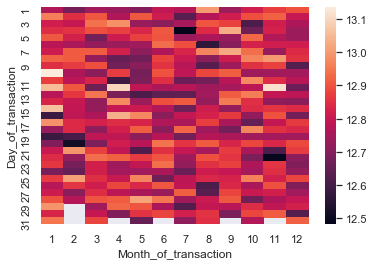

In [122]:
sns.heatmap(pv)

### 2- What is a most common Merchant specialty



In [58]:
df['category'].value_counts()



gas_transport     188029
grocery_pos       176191
home              175460
shopping_pos      166463
kids_pets         161727
shopping_net      139322
entertainment     134118
food_dining       130729
personal_care     130085
health_fitness    122553
misc_pos          114229
misc_net           90654
grocery_net        64878
travel             57956
Name: category, dtype: int64

[Text(0, 0, 'personal_care'),
 Text(0, 0, 'health_fitness'),
 Text(0, 0, 'misc_pos'),
 Text(0, 0, 'travel'),
 Text(0, 0, 'kids_pets'),
 Text(0, 0, 'shopping_pos'),
 Text(0, 0, 'food_dining'),
 Text(0, 0, 'home'),
 Text(0, 0, 'entertainment'),
 Text(0, 0, 'shopping_net'),
 Text(0, 0, 'misc_net'),
 Text(0, 0, 'grocery_pos'),
 Text(0, 0, 'gas_transport'),
 Text(0, 0, 'grocery_net')]

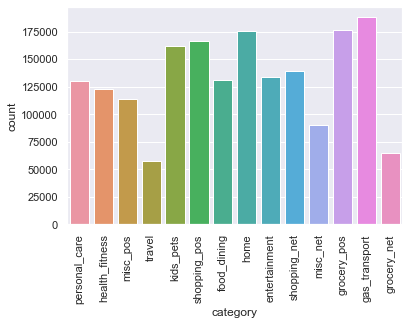

In [217]:
ax=sns.countplot(x='category', data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)


### 3- What is the most common gender make transaction

In [60]:
df['gender'].value_counts()

F    1014749
M     837645
Name: gender, dtype: int64

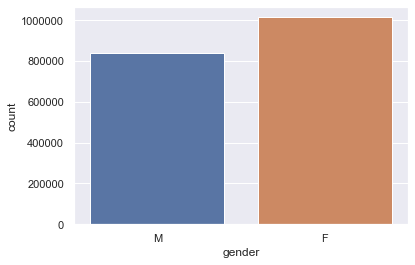

In [218]:
sns.countplot(data=df , x='gender')

### 4- what is the city , state  made the maximum and minimum amount  transaction 

In [231]:
df['amt'].max()

28948.9

In [237]:
df['amt'].min()

1.0

In [236]:
df[df['amt']==28948.9][['state','city']]

state         city
787549    NE  Westerville

In [238]:
df[df['amt']==1.0][['state','city']]

state              city
3942       FL       Port Richey
4436       OH            Amanda
5258       MI           Elberta
24220      CO  Colorado Springs
25041      NC       Gibsonville
26426      NY          Falconer
27710      SC           Arcadia
35966      MI           Wetmore
42910      IA         Lohrville
48498      SC           Clifton
51197      ND          Reynolds
54177      IN      North Judson
84466      SD            Hurley
87589      CA          Glendale
90927      VA     Drakes Branch
101373     WA            Orient
111784     PA             Manor
114634     PA      Philadelphia
115399     PA      Beaver Falls
120683     AL        Montgomery
120942     LA            Gretna
124893     OR       Lake Oswego
125044     NY       Cowlesville
125317     NJ         Elizabeth
131565     TX       Gainesville
138534     PA           Harmony
141984     AL     Phil Campbell
143691     NY     West Sayville
146367     AL        Huntsville
148000     FL          Wauchula
...       ...               ...
1098339    MT           Boulder
1103878    NM          Moriarty
1121560    PA  North Washington
1121732    MD        Kensington
1123096    TX       San Antonio
1123746    NC            Bailey
1129782    ID       Spirit Lake
1138077    TX       Gainesville
1144124    TX            Altair
1148529    MT          Belgrade
1154907    TX            Sachse
1165820    KY      Smiths Grove
1180350    TX            Lolita
1188100    NH            Conway
1192758    OH          Hinckley
1202406    WY          Manville
1224477    FL          Wauchula
1226519    NV   North Las Vegas
1229940    NM          Moriarty
1230321    AL        Birmingham
1233606    TX            Dallas
1238474    MI         Riverview
1242524    NE        Sutherland
1242721    CA        Sacramento
1246730    DC        Washington
1257862    FL          Key West
1277704    OH       Bowersville
1280050    KY         Rochester
1285738    GA           Brinson
1292645    OH           Diamond

[332 rows x 2 columns]

In [64]:
pv2=pd.pivot_table(data=df ,index='state', columns='city' , values='amt')
pv2

city     Achille    Acworth      Adams      Afton      Akron     Albany  \
state                                                                     
AK           NaN        NaN        NaN        NaN        NaN        NaN   
AL           NaN        NaN        NaN        NaN        NaN        NaN   
AR           NaN        NaN        NaN        NaN        NaN        NaN   
AZ           NaN        NaN        NaN        NaN        NaN        NaN   
CA           NaN        NaN        NaN        NaN        NaN        NaN   
CO           NaN        NaN        NaN        NaN        NaN        NaN   
CT           NaN        NaN        NaN        NaN        NaN        NaN   
DC           NaN        NaN        NaN        NaN        NaN        NaN   
DE           NaN        NaN        NaN        NaN        NaN        NaN   
FL           NaN        NaN        NaN        NaN        NaN        NaN   
GA           NaN        NaN        NaN        NaN        NaN        NaN   
HI           NaN        NaN        NaN        NaN        NaN        NaN   
IA           NaN        NaN        NaN        NaN        NaN        NaN   
ID           NaN        NaN        NaN        NaN        NaN        NaN   
IL           NaN        NaN        NaN        NaN        NaN        NaN   
IN           NaN        NaN        NaN        NaN        NaN        NaN   
KS           NaN        NaN        NaN        NaN        NaN        NaN   
KY           NaN        NaN        NaN        NaN        NaN        NaN   
LA           NaN        NaN        NaN        NaN        NaN        NaN   
MA           NaN        NaN        NaN        NaN        NaN        NaN   
MD           NaN        NaN        NaN        NaN        NaN        NaN   
ME           NaN        NaN        NaN        NaN        NaN        NaN   
MI           NaN        NaN        NaN  65.109126        NaN        NaN   
MN           NaN        NaN        NaN  74.783883        NaN        NaN   
MO           NaN        NaN        NaN        NaN        NaN        NaN   
MS           NaN        NaN        NaN        NaN        NaN        NaN   
MT           NaN        NaN        NaN        NaN        NaN        NaN   
NC           NaN        NaN        NaN        NaN        NaN        NaN   
ND           NaN        NaN        NaN        NaN        NaN        NaN   
NE           NaN        NaN        NaN        NaN        NaN        NaN   
NH           NaN  96.687665        NaN        NaN        NaN        NaN   
NJ           NaN        NaN        NaN        NaN        NaN        NaN   
NM           NaN        NaN        NaN        NaN        NaN        NaN   
NV           NaN        NaN        NaN        NaN        NaN        NaN   
NY           NaN        NaN        NaN        NaN        NaN  70.227404   
OH           NaN        NaN        NaN        NaN  79.550382        NaN   
OK     56.751486        NaN        NaN        NaN        NaN        NaN   
OR           NaN        NaN        NaN        NaN        NaN        NaN   
PA           NaN        NaN        NaN        NaN        NaN        NaN   
RI           NaN        NaN        NaN        NaN        NaN        NaN   
SC           NaN        NaN        NaN        NaN        NaN        NaN   
SD           NaN        NaN        NaN        NaN        NaN        NaN   
TN           NaN        NaN        NaN        NaN        NaN        NaN   
TX           NaN        NaN        NaN        NaN        NaN        NaN   
UT           NaN        NaN        NaN        NaN        NaN        NaN   
VA           NaN        NaN        NaN        NaN        NaN        NaN   
VT           NaN        NaN        NaN        NaN        NaN        NaN   
WA           NaN        NaN        NaN        NaN        NaN        NaN   
WI           NaN        NaN  69.673275        NaN        NaN        NaN   
WV           NaN        NaN        NaN        NaN        NaN        NaN   
WY           NaN        NaN        NaN        NaN        NaN        NaN   

city   Albuquerque      

In [65]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

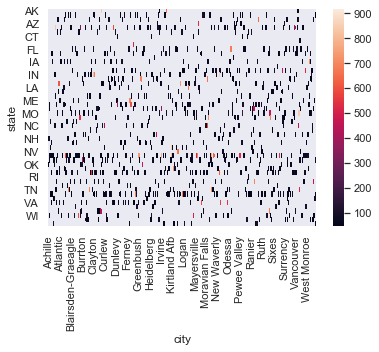

In [224]:
sns.heatmap(pv2)

### 5- what is the city , state  made the  maximum and minimum count transaction

In [240]:
df['city'].value_counts()

Birmingham       8040
San Antonio      7312
Utica            7309
Phoenix          7297
Meridian         7289
Warren           6584
Conway           6574
Cleveland        6572
Thomas           6571
Houston          5865
Arcadia          5850
Naples           5849
Brandon          5844
Fulton           5841
Indianapolis     5838
Burbank          5831
Dallas           5141
Washington       5130
Detroit          5124
Hudson           5123
Lakeland         5120
Allentown        5119
Fort Washakie    5116
Lahoma           5116
Philadelphia     5113
Andrews          5107
Huntsville       5103
Orient           5093
Topeka           4401
Tulsa            4400
                 ... 
Ridge Spring       10
Oakton              9
Grenola             9
Brookfield          9
Clarion             9
East China          9
Guthrie             9
North East          9
Lockhart            9
Nicholson           9
Freeport            9
Medford             9
Morven              8
Buellton            8
Rice      

In [68]:
df['state'].value_counts()

TX    135269
NY    119419
PA    114173
CA     80495
OH     66627
MI     65825
IL     62212
FL     60775
AL     58521
MO     54904
MN     45433
AR     44611
NC     43134
VA     41756
WI     41738
SC     41731
KY     40981
IN     39539
IA     38804
OK     38050
MD     37345
GA     37340
WV     36529
NJ     35131
NE     34425
KS     32939
MS     30021
LA     29953
WY     27776
WA     27040
OR     26408
TN     24913
ME     23433
NM     23427
ND     21183
CO     19766
SD     17574
MA     17562
VT     16812
MT     16806
AZ     15362
UT     15357
NH     11727
CT     10979
NV      8058
ID      8035
DC      5130
HI      3649
AK      2963
RI       745
DE         9
Name: state, dtype: int64

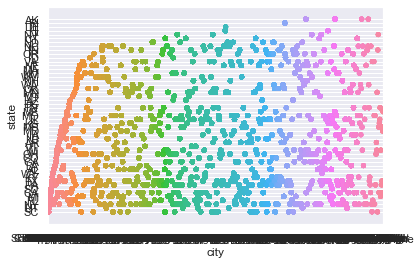

In [121]:
ax2=sns.stripplot(data=df , x='city',y='state')


### 6- what is the city had a maximum and minium population



In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 1296674
Data columns (total 34 columns):
Unnamed: 0               int64
trans_date_trans_time    datetime64[ns]
cc_num                   int64
merchant                 object
category                 object
amt                      float64
first                    object
last                     object
gender                   object
street                   object
city                     object
state                    object
zip                      int64
lat                      float64
long                     float64
city_pop                 int64
job                      object
dob                      datetime64[ns]
trans_num                object
unix_time                int64
merch_lat                float64
merch_long               float64
is_fraud                 int64
Hour_of_transaction      int64
Day_of_transaction       int64
Month_of_transaction     int64
Full Name                object
Distance   

In [247]:
df['city_pop'].max()

2906700

In [251]:
df['city_pop'].min()

23

In [250]:
df[df['city_pop']==2906700]['city'].unique()

array(['Houston'], dtype=object)

In [253]:
df[df['city_pop']==23]['city'].unique()

array(['Notrees'], dtype=object)

[Text(0, 0, 'Columbia'),
 Text(0, 0, 'Altonah'),
 Text(0, 0, 'Bellmore'),
 Text(0, 0, 'Titusville'),
 Text(0, 0, 'Falmouth'),
 Text(0, 0, 'Breesport'),
 Text(0, 0, 'Carlotta'),
 Text(0, 0, 'Spencer'),
 Text(0, 0, 'Morrisdale'),
 Text(0, 0, 'Prairie Hill'),
 Text(0, 0, 'Westport'),
 Text(0, 0, 'Fort Washakie'),
 Text(0, 0, 'Loxahatchee'),
 Text(0, 0, 'Rock Tavern'),
 Text(0, 0, 'Jones'),
 Text(0, 0, 'Deltona'),
 Text(0, 0, 'Key West'),
 Text(0, 0, 'Grandview'),
 Text(0, 0, 'Saint Amant'),
 Text(0, 0, 'Clarks Mills'),
 Text(0, 0, 'Alpharetta'),
 Text(0, 0, 'Colorado Springs'),
 Text(0, 0, 'Greenville'),
 Text(0, 0, 'Tomahawk'),
 Text(0, 0, 'Goodrich'),
 Text(0, 0, 'Daly City'),
 Text(0, 0, 'South Londonderry'),
 Text(0, 0, 'Lepanto'),
 Text(0, 0, 'New Waverly'),
 Text(0, 0, 'New York City'),
 Text(0, 0, 'Pewee Valley'),
 Text(0, 0, 'Plainfield'),
 Text(0, 0, 'Belmond'),
 Text(0, 0, 'Bagley'),
 Text(0, 0, 'Manchester'),
 Text(0, 0, 'Sontag'),
 Text(0, 0, 'Hawthorne'),
 Text(0, 0, 'Gadsden

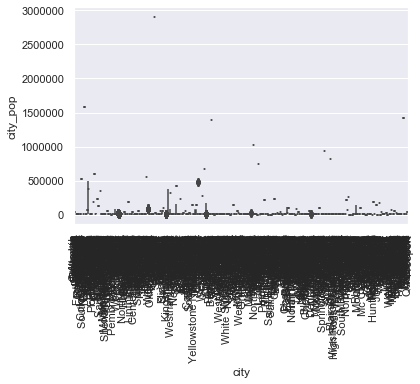

In [120]:
ax2=sns.boxplot(x='city',y='city_pop',data=df)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation = 90)

In [74]:
df

Unnamed: 0 trans_date_trans_time               cc_num  \
0                 0   2020-06-21 12:14:25     2291163933867244   
1                 1   2020-06-21 12:14:33     3573030041201292   
2                 2   2020-06-21 12:14:53     3598215285024754   
3                 3   2020-06-21 12:15:15     3591919803438423   
4                 4   2020-06-21 12:15:17     3526826139003047   
5                 5   2020-06-21 12:15:37       30407675418785   
6                 6   2020-06-21 12:15:44      213180742685905   
7                 7   2020-06-21 12:15:50     3589289942931264   
8                 8   2020-06-21 12:16:10     3596357274378601   
9                 9   2020-06-21 12:16:11     3546897637165774   
10               10   2020-06-21 12:16:20     2242542703101233   
11               11   2020-06-21 12:16:47         571465035400   
12               12   2020-06-21 12:17:21     6593250708747804   
13               13   2020-06-21 12:18:27        4988304376504   
14               14   2020-06-21 12:18:37     6011504998544485   
15               15   2020-06-21 12:18:41     4570636521433188   
16               16   2020-06-21 12:18:54  4906628655840914250   
17               17   2020-06-21 12:19:50     4908846471916297   
18               18   2020-06-21 12:19:56  4861310130652566408   
19               19   2020-06-21 12:20:13     6538441737335434   
20               20   2020-06-21 12:20:34     2283743876903625   
21               21   2020-06-21 12:20:42  4560004149983868183   
22               22   2020-06-21 12:20:57        4562827002127   
23               23   2020-06-21 12:21:46      213153151785052   
24               24   2020-06-21 12:21:47      372509258176510   
25               25   2020-06-21 12:23:08     6011148190095209   
26               26   2020-06-21 12:23:09     6011917798331152   
27               27   2020-06-21 12:23:53     3577663406369449   
28               28   2020-06-21 12:24:11     3502377050801561   
29               29   2020-06-21 12:24:16      180040027502291   
...             ...                   ...                  ...   
1296645     1296645   2020-06-21 12:01:35        4260128500325   
1296646     1296646   2020-06-21 12:02:13     5359543825610251   
1296647     1296647   2020-06-21 12:02:27  4710826438164847414   
1296648     1296648   2020-06-21 12:02:44     3511378610369890   
1296649     1296649   2020-06-21 12:02:57       30234966027947   
1296650     1296650   2020-06-21 12:02:59     6538891242532018   
1296651     1296651   2020-06-21 12:03:37     6534628260579800   
1296652     1296652   2020-06-21 12:04:53       36485887555770   
1296653     1296653   2020-06-21 12:06:04     4377338765909719   
1296654     1296654   2020-06-21 12:06:12     4904681492230012   
1296655     1296655   2020-06-21 12:06:23     3546897637165774   
1296656     1296656   2020-06-21 12:07:09     4158945090781624   
1296657     1296657   2020-06-21 12:07:20        4464457352619   
1296658     1296658   2020-06-21 12:07:47     4302480582202074   
1296659     1296659   2020-06-21 12:07:53      213112402583773   
1296660     1296660   2020-06-21 12:07:54  4040099974063068803   
1296661     1296661   2020-06-21 12:08:08     3586955669388457   
1296662     1296662   2020-06-21 12:08:13      346273234529002   
1296663     1296663   2020-06-21 12:08:32     4335531783520911   
1296664     1296664   2020-06-21 12:08:36     3531129874770000   
1296665     1296665   2020-06-21 12:08:42      213193596103206   
1296666     1296666   2020-06-21 12:09:22  4587657402165341815   
1296667     1296667   2020-06-21 12:10:56     4822367783500458   
1296668     1296668   2020-06-21 12:11:23      213141712584544   
1296669     1296669   2020-06-21 12:11:36  4400011257587661852   
1296670     1296670   2020-06-21 12:12:08       30263540414123   
1296671     1296671   2020-06-21 12:12:19     6011149206456997   
1296672     1296672   2020-06-21 12:12:32     3514865930894695   
1296673     1296673   2020-06-21 12:13:36     272

### 7-  what is the most common 10 names make transactions



In [75]:
df['Full Name'].value_counts() .head(10)

Scott Martin       6583
Jeffrey Smith      5118
Gina Grimes        4392
Lisa Lin           4392
Linda Davis        4389
Justin Bell        4387
Jodi Rodriguez     4386
Sabrina Johnson    4386
Gary Martinez      4386
Allison Allen      4385
Name: Full Name, dtype: int64

In [76]:
sns.jointplot(x='trans_num',y='Full Name',data=df.value_counts())

### 8-  What is the most common job 



In [77]:
df['job'].value_counts().head(1)

Film/video editor    13898
Name: job, dtype: int64

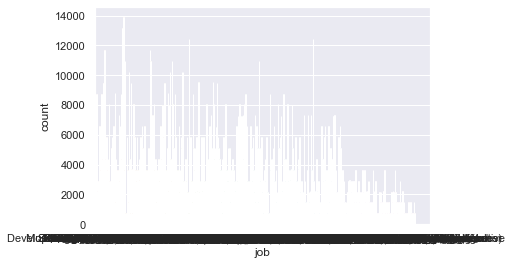

In [119]:
sns.countplot(x='job',data=df)



### 9- What is the avarage age made transaction 



In [79]:
df['Age'].mean()

46.211379976398106

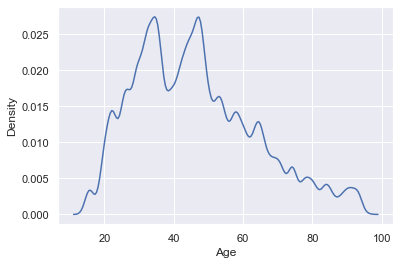

In [118]:
sns.kdeplot(x='Age',data=df)


In [140]:
df3=df.head(50)

In [127]:
df3

Unnamed: 0 trans_date_trans_time               cc_num  \
0            0   2020-06-21 12:14:25     2291163933867244   
1            1   2020-06-21 12:14:33     3573030041201292   
2            2   2020-06-21 12:14:53     3598215285024754   
3            3   2020-06-21 12:15:15     3591919803438423   
4            4   2020-06-21 12:15:17     3526826139003047   
5            5   2020-06-21 12:15:37       30407675418785   
6            6   2020-06-21 12:15:44      213180742685905   
7            7   2020-06-21 12:15:50     3589289942931264   
8            8   2020-06-21 12:16:10     3596357274378601   
9            9   2020-06-21 12:16:11     3546897637165774   
10          10   2020-06-21 12:16:20     2242542703101233   
11          11   2020-06-21 12:16:47         571465035400   
12          12   2020-06-21 12:17:21     6593250708747804   
13          13   2020-06-21 12:18:27        4988304376504   
14          14   2020-06-21 12:18:37     6011504998544485   
15          15   2020-06-21 12:18:41     4570636521433188   
16          16   2020-06-21 12:18:54  4906628655840914250   
17          17   2020-06-21 12:19:50     4908846471916297   
18          18   2020-06-21 12:19:56  4861310130652566408   
19          19   2020-06-21 12:20:13     6538441737335434   

                          merchant        category     amt      first  \
0                  Kirlin and Sons   personal_care    2.86       Jeff   
1                   Sporer-Keebler   personal_care   29.84     Joanne   
2   Swaniawski, Nitzsche and Welch  health_fitness   41.28     Ashley   
3                      Haley Group        misc_pos   60.05      Brian   
4                  Johnston-Casper          travel    3.19     Nathan   
5                    Daugherty LLC       kids_pets   19.55   Danielle   
6                    Romaguera Ltd  health_fitness  133.93      Kayla   
7                      Reichel LLC   personal_care   10.37      Paula   
8      Goyette, Howell and Collier    shopping_pos    4.37      David   
9                    Kilback Group     food_dining   66.54      Kayla   
10          Feil, Hilpert and Koss     food_dining    7.01     Samuel   
11                  Gottlieb Group       kids_pets   42.40      Louis   
12                 Connelly-Carter            home    2.91    Melissa   
13                Bechtelar-Rippin     food_dining    7.93    William   
14                 Lubowitz-Walter       kids_pets    2.91     Ashley   
15           Welch, Rath and Koepp   entertainment   24.73  Christine   
16                    Hickle Group    shopping_pos    2.33    Charles   
17         Lang, Towne and Schuppe       kids_pets   16.60     Lauren   
18                  Morissette LLC   entertainment   80.11     Ashley   
19                    Prosacco LLC   personal_care    5.71       Gina   

        last gender                         street  ... Hour_of_transaction  \
0    Elliott      M              351 Darlene Green  ...                  12   
1   Williams      F               3638 Marsh Union  ...                  12   
2      Lopez      F           9333 Valentine Point  ...                  12   
3   Williams      M    32941 Krystal Mill Apt. 552  ...                  12   
4     Massey      M       5783 Evan Roads Apt. 465  ...                  12   
5      Evans      F     76752 David Lodge Apt. 064  ...                  12   
6     Sutton      F                010 Weaver Land  ...                  12   
7    Estrada      F                350 Stacy Glens  ...                  12   
8    Everett      M                4138 David Fall  ...                  12   
9     Obrien      F     7921 Robert Port Suite 343  ...                  12   
10   Jenkins      M  43235 Mckenzie Views Apt. 837  ...                  12   
11    Fisher      M                45654 Hess Rest  ...                  12   
12      Meza      F             244 Abbott Parkway  ...                  12   
13  Thompson      M        977 Rita Grove Apt. 000  ...                  12   
14 

In [82]:
df

Unnamed: 0 trans_date_trans_time               cc_num  \
0                 0   2020-06-21 12:14:25     2291163933867244   
1                 1   2020-06-21 12:14:33     3573030041201292   
2                 2   2020-06-21 12:14:53     3598215285024754   
3                 3   2020-06-21 12:15:15     3591919803438423   
4                 4   2020-06-21 12:15:17     3526826139003047   
5                 5   2020-06-21 12:15:37       30407675418785   
6                 6   2020-06-21 12:15:44      213180742685905   
7                 7   2020-06-21 12:15:50     3589289942931264   
8                 8   2020-06-21 12:16:10     3596357274378601   
9                 9   2020-06-21 12:16:11     3546897637165774   
10               10   2020-06-21 12:16:20     2242542703101233   
11               11   2020-06-21 12:16:47         571465035400   
12               12   2020-06-21 12:17:21     6593250708747804   
13               13   2020-06-21 12:18:27        4988304376504   
14               14   2020-06-21 12:18:37     6011504998544485   
15               15   2020-06-21 12:18:41     4570636521433188   
16               16   2020-06-21 12:18:54  4906628655840914250   
17               17   2020-06-21 12:19:50     4908846471916297   
18               18   2020-06-21 12:19:56  4861310130652566408   
19               19   2020-06-21 12:20:13     6538441737335434   
20               20   2020-06-21 12:20:34     2283743876903625   
21               21   2020-06-21 12:20:42  4560004149983868183   
22               22   2020-06-21 12:20:57        4562827002127   
23               23   2020-06-21 12:21:46      213153151785052   
24               24   2020-06-21 12:21:47      372509258176510   
25               25   2020-06-21 12:23:08     6011148190095209   
26               26   2020-06-21 12:23:09     6011917798331152   
27               27   2020-06-21 12:23:53     3577663406369449   
28               28   2020-06-21 12:24:11     3502377050801561   
29               29   2020-06-21 12:24:16      180040027502291   
...             ...                   ...                  ...   
1296645     1296645   2020-06-21 12:01:35        4260128500325   
1296646     1296646   2020-06-21 12:02:13     5359543825610251   
1296647     1296647   2020-06-21 12:02:27  4710826438164847414   
1296648     1296648   2020-06-21 12:02:44     3511378610369890   
1296649     1296649   2020-06-21 12:02:57       30234966027947   
1296650     1296650   2020-06-21 12:02:59     6538891242532018   
1296651     1296651   2020-06-21 12:03:37     6534628260579800   
1296652     1296652   2020-06-21 12:04:53       36485887555770   
1296653     1296653   2020-06-21 12:06:04     4377338765909719   
1296654     1296654   2020-06-21 12:06:12     4904681492230012   
1296655     1296655   2020-06-21 12:06:23     3546897637165774   
1296656     1296656   2020-06-21 12:07:09     4158945090781624   
1296657     1296657   2020-06-21 12:07:20        4464457352619   
1296658     1296658   2020-06-21 12:07:47     4302480582202074   
1296659     1296659   2020-06-21 12:07:53      213112402583773   
1296660     1296660   2020-06-21 12:07:54  4040099974063068803   
1296661     1296661   2020-06-21 12:08:08     3586955669388457   
1296662     1296662   2020-06-21 12:08:13      346273234529002   
1296663     1296663   2020-06-21 12:08:32     4335531783520911   
1296664     1296664   2020-06-21 12:08:36     3531129874770000   
1296665     1296665   2020-06-21 12:08:42      213193596103206   
1296666     1296666   2020-06-21 12:09:22  4587657402165341815   
1296667     1296667   2020-06-21 12:10:56     4822367783500458   
1296668     1296668   2020-06-21 12:11:23      213141712584544   
1296669     1296669   2020-06-21 12:11:36  4400011257587661852   
1296670     1296670   2020-06-21 12:12:08       30263540414123   
1296671     1296671   2020-06-21 12:12:19     6011149206456997   
1296672     1296672   2020-06-21 12:12:32     3514865930894695   
1296673     1296673   2020-06-21 12:13:36     272

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 1296674
Data columns (total 33 columns):
Unnamed: 0               int64
trans_date_trans_time    datetime64[ns]
cc_num                   int64
merchant                 object
category                 object
amt                      float64
first                    object
last                     object
gender                   object
street                   object
city                     object
state                    object
zip                      int64
lat                      float64
long                     float64
city_pop                 int64
job                      object
dob                      datetime64[ns]
trans_num                object
unix_time                int64
merch_lat                float64
merch_long               float64
is_fraud                 int64
Hour_of_transaction      int64
Day_of_transaction       int64
Month_of_transaction     int64
Full Name                object
Distance   

### 10- Which gender made more transaction process



In [86]:
df['gender'].value_counts()

F    1014749
M     837645
Name: gender, dtype: int64

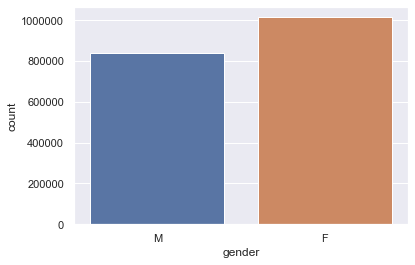

In [116]:
sns.countplot(x='gender',data=df)

### 11- Which is most common category 



In [88]:
df['category'].value_counts()

gas_transport     188029
grocery_pos       176191
home              175460
shopping_pos      166463
kids_pets         161727
shopping_net      139322
entertainment     134118
food_dining       130729
personal_care     130085
health_fitness    122553
misc_pos          114229
misc_net           90654
grocery_net        64878
travel             57956
Name: category, dtype: int64

[Text(0, 0, 'personal_care'),
 Text(0, 0, 'health_fitness'),
 Text(0, 0, 'misc_pos'),
 Text(0, 0, 'travel'),
 Text(0, 0, 'kids_pets'),
 Text(0, 0, 'shopping_pos'),
 Text(0, 0, 'food_dining'),
 Text(0, 0, 'home'),
 Text(0, 0, 'entertainment'),
 Text(0, 0, 'shopping_net'),
 Text(0, 0, 'misc_net'),
 Text(0, 0, 'grocery_pos'),
 Text(0, 0, 'gas_transport'),
 Text(0, 0, 'grocery_net')]

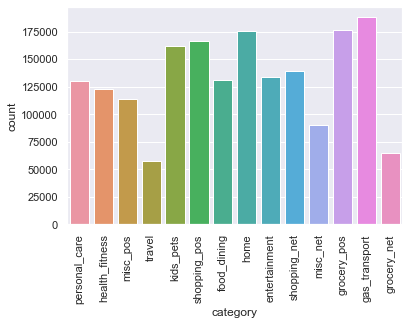

In [115]:
ax3=sns.countplot(x='category',data=df)
ax3.set_xticklabels(ax3.get_xticklabels(),rotation = 90)

### 12- what is the avarage age for each gender



In [90]:
df.groupby('gender')['Age'].mean()

gender
F    46.135461
M    46.303350
Name: Age, dtype: float64

### 13- what is the  hour used for maxmim number of transaction



In [91]:
df['Hour_of_transaction'].value_counts() 

23    95902
22    95370
16    94289
18    94052
21    93738
17    93514
13    93492
15    93439
19    93433
12    93294
14    93089
20    93081
1     61330
3     60968
2     60796
0     60655
8     60498
6     60406
10    60320
7     60301
9     60231
11    60170
5     60088
4     59938
Name: Hour_of_transaction, dtype: int64

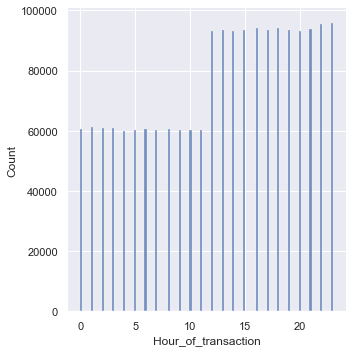

In [256]:
sns.displot(x='Hour_of_transaction', data=df)

### 14 - the relation between the amount and the fraud


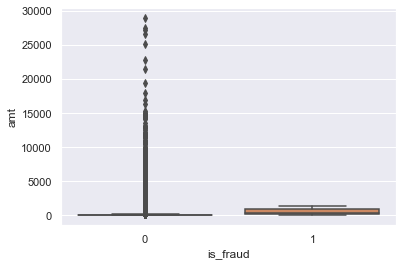

In [260]:
sns.boxplot(x='is_fraud',y='amt',data=df)

### 15- What is the top 3 category has a maximum counts of transaction process



In [94]:
df['category'].value_counts().head(3)

gas_transport    188029
grocery_pos      176191
home             175460
Name: category, dtype: int64

### 16 - What is the city has a maximum number of frauds.



In [95]:
df[df['is_fraud']>0]['city'].value_counts()

Dallas            39
Houston           39
Birmingham        36
New York City     35
Camden            34
Allentown         34
Detroit           33
Warren            33
Washington        31
Arcadia           30
Naples            29
Huntsville        29
Tulsa             27
Topeka            27
Randolph          25
San Antonio       25
Utica             25
Beaver Falls      24
Clearwater        24
Albuquerque       24
Aurora            23
Louisville        23
Georgetown        23
Thomas            23
Des Moines        23
Bay City          22
Fort Washakie     21
Hudson            21
Brandon           21
Lakeland          21
                  ..
May                4
Port Gibson        4
Prairie Hill       4
Grassflat          4
Sun City           4
Powell Butte       4
Rochester          4
Ruth               4
Oakford            4
Spearsville        4
Comfrey            4
Holloway           4
Early              4
Valdosta           3
Newhall            3
Bonita Springs     3
Hurricane    

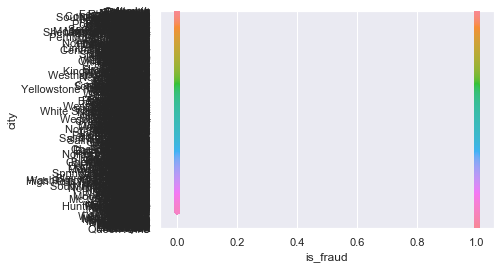

In [96]:
sns.stripplot(x='is_fraud',y='city',data=df)

### 17 - What is the relation between fraud and distance



In [97]:
df['is_fraud'].corr(df['Distance'])

0.00035916793869184525

In [98]:
#sns.boxplot(x='Distance',y='is_fraud',data=df)

### 18-what is the most common hour used by fraud to make a transaction



In [99]:
df[df['is_fraud']>0]['Hour_of_transaction'].value_counts()

22    2481
23    2442
1      827
0      823
3      803
2      793
18     111
19     105
21     101
15     100
14     100
20      98
16      97
13      94
17      94
12      84
5       80
7       72
4       61
9       61
11      59
8       59
6       54
10      52
Name: Hour_of_transaction, dtype: int64

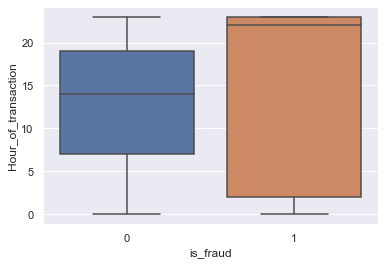

In [100]:
sns.boxplot(y='Hour_of_transaction',x='is_fraud', data=df)

In [101]:
df['is_fraud'].unique()

array([0, 1])

### 19 - what is the relation between age and fraud

In [300]:
df['is_fraud'].corr(df['Age'])
#weak relation

0.010926705069542735

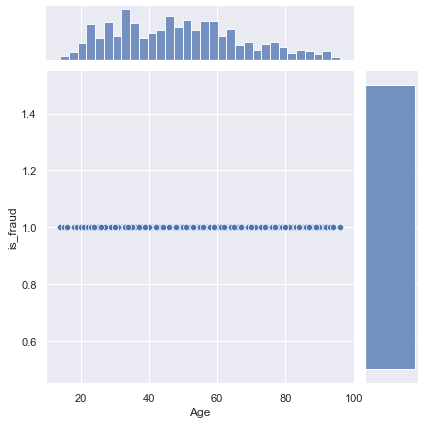

In [310]:
sns.jointplot(x='Age',y='is_fraud',data=df_fraud)


### 20- what is the city has a minimum number of frauds and the category used



In [287]:
df[df['is_fraud']>0]['city'].value_counts()

Dallas            39
Houston           39
Birmingham        36
New York City     35
Camden            34
Allentown         34
Detroit           33
Warren            33
Washington        31
Arcadia           30
Naples            29
Huntsville        29
Tulsa             27
Topeka            27
Randolph          25
San Antonio       25
Utica             25
Beaver Falls      24
Clearwater        24
Albuquerque       24
Aurora            23
Louisville        23
Georgetown        23
Thomas            23
Des Moines        23
Bay City          22
Fort Washakie     21
Hudson            21
Brandon           21
Lakeland          21
                  ..
May                4
Port Gibson        4
Prairie Hill       4
Grassflat          4
Sun City           4
Powell Butte       4
Rochester          4
Ruth               4
Oakford            4
Spearsville        4
Comfrey            4
Holloway           4
Early              4
Valdosta           3
Newhall            3
Bonita Springs     3
Hurricane    

In [290]:
df[df['city']=='Littleton']['category'].value_counts()

shopping_pos      497
grocery_pos       445
shopping_net      417
home              410
kids_pets         384
personal_care     346
food_dining       310
misc_pos          280
health_fitness    277
entertainment     276
grocery_net       268
misc_net          214
gas_transport     153
travel             98
Name: category, dtype: int64

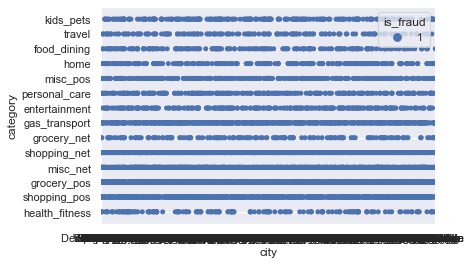

In [298]:
sns.stripplot(x='city',y='category',data=df_fraud,hue='is_fraud')

### 21-what is the gender that scammed maximim amount 



In [103]:
df[df['is_fraud']>0]['gender'].max()

'M'

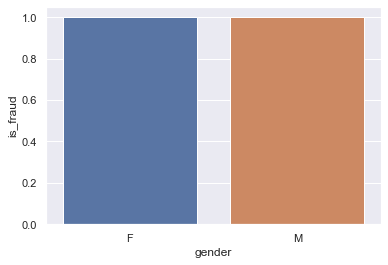

In [199]:
sns.barplot(y='is_fraud',x='gender', data=df_fraud)

### 22- How much amount that has been scammed the most?



In [211]:
df[ df['is_fraud']>0 ]['amt'].max()

1376.04

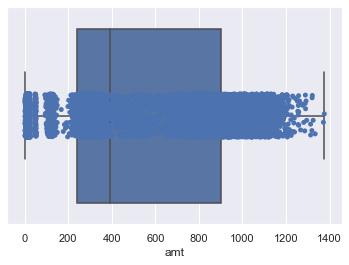

In [261]:
sns.boxplot(x='amt', data=df_fraud)
sns.stripplot(x='amt', data=df_fraud)

### 23- What type of category that has been scammed the most



In [107]:
df [['amt','category','is_fraud']] 

amt        category  is_fraud
0          2.86   personal_care         0
1         29.84   personal_care         0
2         41.28  health_fitness         0
3         60.05        misc_pos         0
4          3.19          travel         0
5         19.55       kids_pets         0
6        133.93  health_fitness         0
7         10.37   personal_care         0
8          4.37    shopping_pos         0
9         66.54     food_dining         0
10         7.01     food_dining         0
11        42.40       kids_pets         0
12         2.91            home         0
13         7.93     food_dining         0
14         2.91       kids_pets         0
15        24.73   entertainment         0
16         2.33    shopping_pos         0
17        16.60       kids_pets         0
18        80.11   entertainment         0
19         5.71   personal_care         0
20         8.53          travel         0
21        37.95       kids_pets         0
22         1.74          travel         0
23         6.02          travel         0
24         9.87    shopping_pos         0
25        47.06     food_dining         0
26         1.70  health_fitness         0
27         2.17   personal_care         0
28         6.21          travel         0
29        24.44   personal_care         0
...         ...             ...       ...
1296645   69.74   entertainment         0
1296646  110.32  health_fitness         0
1296647   10.14     food_dining         0
1296648   13.47   entertainment         0
1296649    2.18   entertainment         0
1296650   19.03            home         0
1296651    7.38        misc_pos         0
1296652  125.14   entertainment         0
1296653   53.98        misc_pos         0
1296654   29.91   personal_care         0
1296655   78.40     food_dining         0
1296656    5.48        misc_pos         0
1296657  264.22        misc_net         0
1296658   12.66     food_dining         0
1296659    9.72    shopping_pos         0
1296660   49.93       kids_pets         0
1296661   77.83            home         0
1296662  157.69   personal_care         0
1296663   84.10            home         0
1296664   69.38   entertainment         0
1296665   72.17            home         0
1296666    7.30  health_fitness         0
1296667   19.71          travel         0
1296668  100.85       kids_pets         0
1296669   37.38        misc_pos         0
1296670   15.56   entertainment         0
1296671   51.70     food_dining         0
1296672  105.93     food_dining         0
1296673   74.90     food_dining         0
1296674    4.30     food_dining         0

[1852394 rows x 3 columns]

In [108]:
df[df['is_fraud']==1]['amt'].max()

1376.04

In [109]:
df[df['amt']==1376.04]['category']

466345     shopping_pos
1262544    shopping_pos
Name: category, dtype: object

[Text(0, 0, 'personal_care'),
 Text(0, 0, 'health_fitness'),
 Text(0, 0, 'misc_pos'),
 Text(0, 0, 'travel'),
 Text(0, 0, 'kids_pets'),
 Text(0, 0, 'shopping_pos'),
 Text(0, 0, 'food_dining'),
 Text(0, 0, 'home'),
 Text(0, 0, 'entertainment'),
 Text(0, 0, 'shopping_net'),
 Text(0, 0, 'misc_net'),
 Text(0, 0, 'grocery_pos'),
 Text(0, 0, 'gas_transport'),
 Text(0, 0, 'grocery_net')]

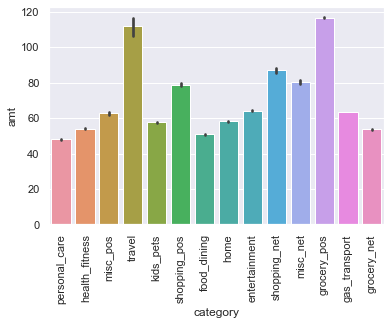

In [110]:
ax4=sns.barplot(x='category', y='amt', data=df)
ax4.set_xticklabels(ax4.get_xticklabels(),rotation = 90)

### 24- What is gender that has been scammed the most?

In [111]:
df[df['amt']==1376.04]['gender']

466345     M
1262544    F
Name: gender, dtype: object

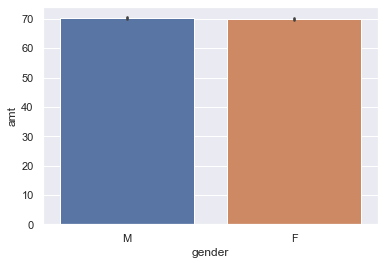

In [112]:
sns.barplot(x='gender', y='amt', data=df)

### 25- What is the season that has a maximum number of transaction



In [299]:
df['seasons'].value_counts()

Summer    522431
Winter    482982
spring    425634
FAll      421347
Name: seasons, dtype: int64

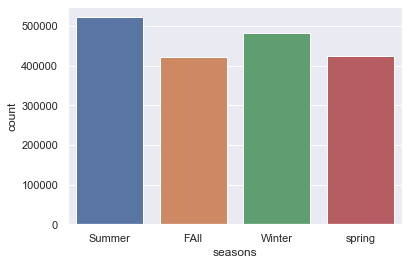

In [152]:
sns.countplot(x='seasons',data=df)

### 26- What is the season that has a maximum number of frauds



In [161]:
df [     df['is_fraud']>0     ]['seasons'].value_counts()

Winter    2552
spring    2551
FAll      2278
Summer    2270
Name: seasons, dtype: int64

In [195]:
df_fraud=df [     df['is_fraud']>0    ]
df_fraud['is_fraud'].unique()

array([1])

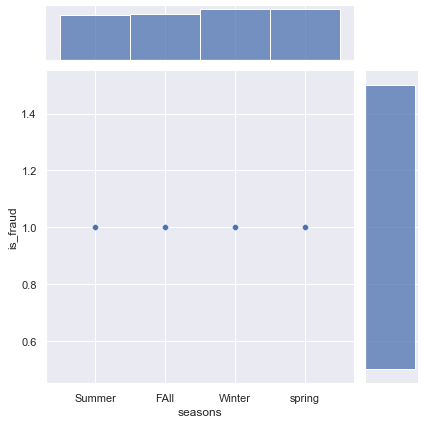

In [168]:
sns.jointplot(y='is_fraud',x='seasons',data=df_fraud)

### 27- What is the season that has a maximum number of amount 

In [191]:
df.groupby('seasons')['amt'].max()

seasons
FAll      26544.12
Summer    25086.94
Winter    28948.90
spring    27119.77
Name: amt, dtype: float64

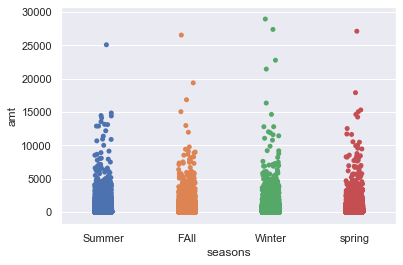

In [189]:
sns.stripplot(x='seasons',y='amt',data=df)

### 28- What is the relation between user state and merchant state



[Text(0, 0, 'South Carolina'),
 Text(0, 0, 'Utah'),
 Text(0, 0, 'New York'),
 Text(0, 0, 'Florida'),
 Text(0, 0, 'Michigan'),
 Text(0, 0, 'Pennsylvania'),
 Text(0, 0, 'South Dakota'),
 Text(0, 0, 'Texas'),
 Text(0, 0, 'Kentucky'),
 Text(0, 0, 'Wyoming'),
 Text(0, 0, 'Alabama'),
 Text(0, 0, 'Louisiana'),
 Text(0, 0, 'Colorado'),
 Text(0, 0, 'Ohio'),
 Text(0, 0, 'Wisconsin'),
 Text(0, 0, 'Massachusetts'),
 Text(0, 0, 'Missouri'),
 Text(0, 0, 'New Jersey'),
 Text(0, 0, 'Indiana'),
 Text(0, 0, 'Iowa'),
 Text(0, 0, 'Maryland'),
 Text(0, 0, 'Mississippi'),
 Text(0, 0, 'California'),
 Text(0, 0, 'Kansas')]

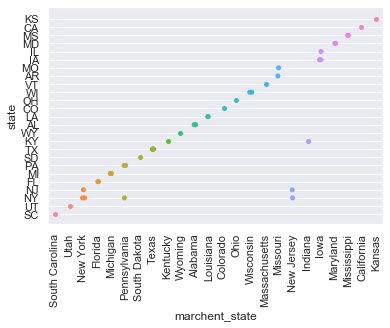

In [196]:
ax4=sns.stripplot(x='marchent_state',y='state',data=df3)
ax4.set_xticklabels(ax4.get_xticklabels(),rotation = 90)

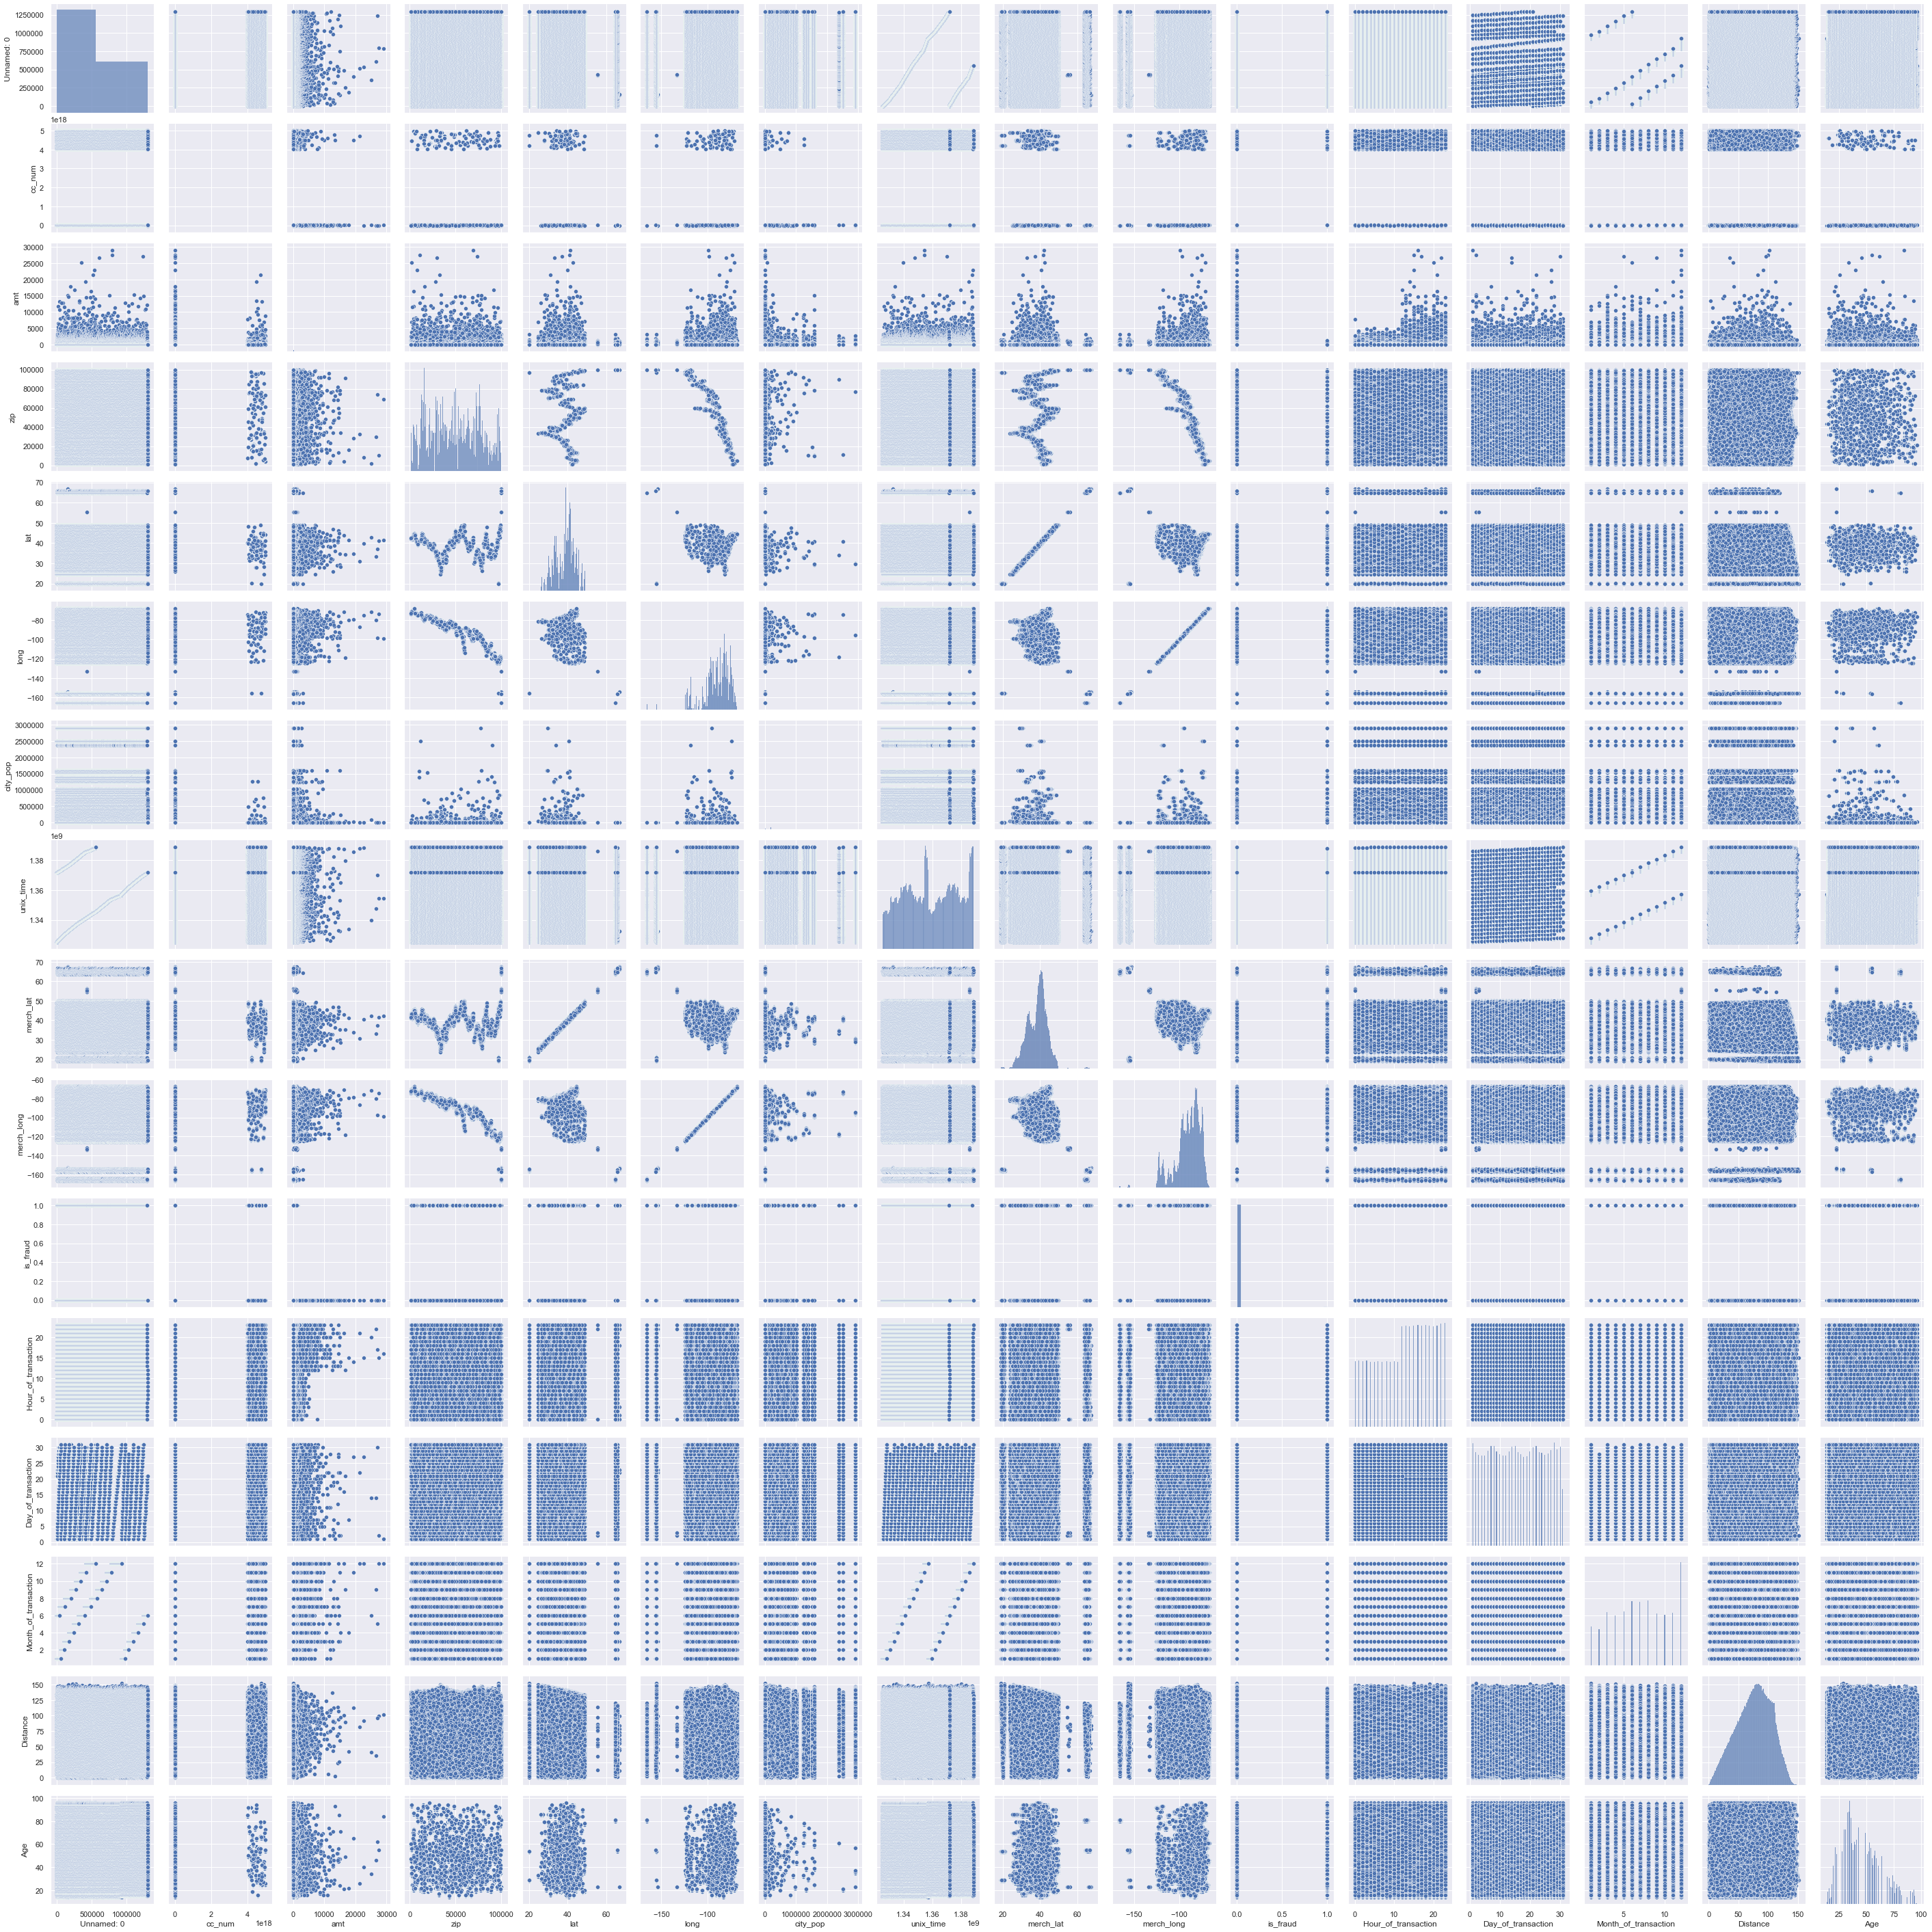

In [113]:
sns.pairplot(df)

In [311]:
df

Unnamed: 0 trans_date_trans_time               cc_num  \
0                 0   2020-06-21 12:14:25     2291163933867244   
1                 1   2020-06-21 12:14:33     3573030041201292   
2                 2   2020-06-21 12:14:53     3598215285024754   
3                 3   2020-06-21 12:15:15     3591919803438423   
4                 4   2020-06-21 12:15:17     3526826139003047   
5                 5   2020-06-21 12:15:37       30407675418785   
6                 6   2020-06-21 12:15:44      213180742685905   
7                 7   2020-06-21 12:15:50     3589289942931264   
8                 8   2020-06-21 12:16:10     3596357274378601   
9                 9   2020-06-21 12:16:11     3546897637165774   
10               10   2020-06-21 12:16:20     2242542703101233   
11               11   2020-06-21 12:16:47         571465035400   
12               12   2020-06-21 12:17:21     6593250708747804   
13               13   2020-06-21 12:18:27        4988304376504   
14               14   2020-06-21 12:18:37     6011504998544485   
15               15   2020-06-21 12:18:41     4570636521433188   
16               16   2020-06-21 12:18:54  4906628655840914250   
17               17   2020-06-21 12:19:50     4908846471916297   
18               18   2020-06-21 12:19:56  4861310130652566408   
19               19   2020-06-21 12:20:13     6538441737335434   
20               20   2020-06-21 12:20:34     2283743876903625   
21               21   2020-06-21 12:20:42  4560004149983868183   
22               22   2020-06-21 12:20:57        4562827002127   
23               23   2020-06-21 12:21:46      213153151785052   
24               24   2020-06-21 12:21:47      372509258176510   
25               25   2020-06-21 12:23:08     6011148190095209   
26               26   2020-06-21 12:23:09     6011917798331152   
27               27   2020-06-21 12:23:53     3577663406369449   
28               28   2020-06-21 12:24:11     3502377050801561   
29               29   2020-06-21 12:24:16      180040027502291   
...             ...                   ...                  ...   
1296645     1296645   2020-06-21 12:01:35        4260128500325   
1296646     1296646   2020-06-21 12:02:13     5359543825610251   
1296647     1296647   2020-06-21 12:02:27  4710826438164847414   
1296648     1296648   2020-06-21 12:02:44     3511378610369890   
1296649     1296649   2020-06-21 12:02:57       30234966027947   
1296650     1296650   2020-06-21 12:02:59     6538891242532018   
1296651     1296651   2020-06-21 12:03:37     6534628260579800   
1296652     1296652   2020-06-21 12:04:53       36485887555770   
1296653     1296653   2020-06-21 12:06:04     4377338765909719   
1296654     1296654   2020-06-21 12:06:12     4904681492230012   
1296655     1296655   2020-06-21 12:06:23     3546897637165774   
1296656     1296656   2020-06-21 12:07:09     4158945090781624   
1296657     1296657   2020-06-21 12:07:20        4464457352619   
1296658     1296658   2020-06-21 12:07:47     4302480582202074   
1296659     1296659   2020-06-21 12:07:53      213112402583773   
1296660     1296660   2020-06-21 12:07:54  4040099974063068803   
1296661     1296661   2020-06-21 12:08:08     3586955669388457   
1296662     1296662   2020-06-21 12:08:13      346273234529002   
1296663     1296663   2020-06-21 12:08:32     4335531783520911   
1296664     1296664   2020-06-21 12:08:36     3531129874770000   
1296665     1296665   2020-06-21 12:08:42      213193596103206   
1296666     1296666   2020-06-21 12:09:22  4587657402165341815   
1296667     1296667   2020-06-21 12:10:56     4822367783500458   
1296668     1296668   2020-06-21 12:11:23      213141712584544   
1296669     1296669   2020-06-21 12:11:36  4400011257587661852   
1296670     1296670   2020-06-21 12:12:08       30263540414123   
1296671     1296671   2020-06-21 12:12:19     6011149206456997   
1296672     1296672   2020-06-21 12:12:32     3514865930894695   
1296673     1296673   2020-06-21 12:13:36     272

In [312]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 1296674
Data columns (total 34 columns):
Unnamed: 0               int64
trans_date_trans_time    datetime64[ns]
cc_num                   int64
merchant                 object
category                 object
amt                      float64
first                    object
last                     object
gender                   object
street                   object
city                     object
state                    object
zip                      int64
lat                      float64
long                     float64
city_pop                 int64
job                      object
dob                      datetime64[ns]
trans_num                object
unix_time                int64
merch_lat                float64
merch_long               float64
is_fraud                 int64
Hour_of_transaction      int64
Day_of_transaction       int64
Month_of_transaction     int64
Full Name                object
Distance   

In [59]:
df.drop(['city_pop','city','merchant','Unnamed: 0'], axis=1 , inplace=True)

In [60]:
df.drop(['trans_num','Full Name'], axis=1 , inplace=True)

In [61]:
df.drop(['trans_date_trans_time'], axis=1 , inplace=True)

In [62]:
df.drop(['first','last','street','zip','lat','long','dob','merch_lat','merch_long',
        'unix_time','home_country','marchent_country','Merch_city','marchent_state','seasons','Distance'], axis=1 ,inplace=True)



In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 1296674
Data columns (total 11 columns):
cc_num                  int64
category                object
amt                     float64
gender                  object
state                   object
job                     object
is_fraud                int64
Hour_of_transaction     int64
Day_of_transaction      int64
Month_of_transaction    int64
Age                     int64
dtypes: float64(1), int64(6), object(4)
memory usage: 169.6+ MB


In [64]:
df

cc_num        category     amt gender state  \
0           2291163933867244   personal_care    2.86      M    SC   
1           3573030041201292   personal_care   29.84      F    UT   
2           3598215285024754  health_fitness   41.28      F    NY   
3           3591919803438423        misc_pos   60.05      M    FL   
4           3526826139003047          travel    3.19      M    MI   
5             30407675418785       kids_pets   19.55      F    NY   
6            213180742685905  health_fitness  133.93      F    CA   
7           3589289942931264   personal_care   10.37      F    SD   
8           3596357274378601    shopping_pos    4.37      M    PA   
9           3546897637165774     food_dining   66.54      F    TX   
10          2242542703101233     food_dining    7.01      M    KY   
11              571465035400       kids_pets   42.40      M    WY   
12          6593250708747804            home    2.91      F    FL   
13             4988304376504     food_dining    7.93      M    NY   
14          6011504998544485       kids_pets    2.91      F    AL   
15          4570636521433188   entertainment   24.73      F    FL   
16       4906628655840914250    shopping_pos    2.33      M    FL   
17          4908846471916297       kids_pets   16.60      F    TX   
18       4861310130652566408   entertainment   80.11      F    LA   
19          6538441737335434   personal_care    5.71      F    PA   
20          2283743876903625          travel    8.53      F    GA   
21       4560004149983868183       kids_pets   37.95      F    CO   
22             4562827002127          travel    1.74      M    OH   
23           213153151785052          travel    6.02      F    WI   
24           372509258176510    shopping_pos    9.87      F    MI   
25          6011148190095209     food_dining   47.06      F    CA   
26          6011917798331152  health_fitness    1.70      M    VT   
27          3577663406369449   personal_care    2.17      M    AR   
28          3502377050801561          travel    6.21      F    TX   
29           180040027502291   personal_care   24.44      F    NY   
...                      ...             ...     ...    ...   ...   
1296645        4260128500325   entertainment   69.74      F    KY   
1296646     5359543825610251  health_fitness  110.32      M    MT   
1296647  4710826438164847414     food_dining   10.14      M    MT   
1296648     3511378610369890   entertainment   13.47      M    AL   
1296649       30234966027947   entertainment    2.18      M    WI   
1296650     6538891242532018            home   19.03      F    AR   
1296651     6534628260579800        misc_pos    7.38      F    VT   
1296652       36485887555770   entertainment  125.14      M    OH   
1296653     4377338765909719        misc_pos   53.98      M    TN   
1296654     4904681492230012   personal_care   29.91      F    NY   
1296655     3546897637165774     food_dining   78.40      F    TX   
1296656     4158945090781624        misc_pos    5.48      M    PA   
1296657        4464457352619        misc_net  264.22      F    FL   
1296658     4302480582202074     food_dining   12.66      M    MI   
1296659      213112402583773    shopping_pos    9.72      F    SC   
1296660  4040099974063068803       kids_pets   49.93      M    ND   
1296661     3586955669388457            home   77.83      M    PA   
1296662      346273234529002   personal_care  157.69      F    WV   
1296663     4335531783520911            home   84.10      F    MO   
1296664     3531129874770000   entertainment   69.38      F    VT   
1296665      213193596103206            home   72.17      M    MI   
1296666  4587657402165341815  health_fitness    7.30      F    IL   
1296667     4822367783500458          travel   19.71      M    FL   
1296668      213141712584544       kids_pets  100.85      F    MS   
1296669  4400011257587661852        misc_pos   37.38      F    NE   
1296670       30263540414123   entertainment   15.56      M    UT   
1296671     60111492

# Step 4 : Dummy Variables

In [65]:
df3=df

In [66]:
df3 = pd.get_dummies(df3, columns=['category','gender','job','state'], drop_first=True)
df3

cc_num     amt  is_fraud  Hour_of_transaction  \
0           2291163933867244    2.86         0                   12   
1           3573030041201292   29.84         0                   12   
2           3598215285024754   41.28         0                   12   
3           3591919803438423   60.05         0                   12   
4           3526826139003047    3.19         0                   12   
5             30407675418785   19.55         0                   12   
6            213180742685905  133.93         0                   12   
7           3589289942931264   10.37         0                   12   
8           3596357274378601    4.37         0                   12   
9           3546897637165774   66.54         0                   12   
10          2242542703101233    7.01         0                   12   
11              571465035400   42.40         0                   12   
12          6593250708747804    2.91         0                   12   
13             4988304376504    7.93         0                   12   
14          6011504998544485    2.91         0                   12   
15          4570636521433188   24.73         0                   12   
16       4906628655840914250    2.33         0                   12   
17          4908846471916297   16.60         0                   12   
18       4861310130652566408   80.11         0                   12   
19          6538441737335434    5.71         0                   12   
20          2283743876903625    8.53         0                   12   
21       4560004149983868183   37.95         0                   12   
22             4562827002127    1.74         0                   12   
23           213153151785052    6.02         0                   12   
24           372509258176510    9.87         0                   12   
25          6011148190095209   47.06         0                   12   
26          6011917798331152    1.70         0                   12   
27          3577663406369449    2.17         0                   12   
28          3502377050801561    6.21         0                   12   
29           180040027502291   24.44         0                   12   
...                      ...     ...       ...                  ...   
1296645        4260128500325   69.74         0                   12   
1296646     5359543825610251  110.32         0                   12   
1296647  4710826438164847414   10.14         0                   12   
1296648     3511378610369890   13.47         0                   12   
1296649       30234966027947    2.18         0                   12   
1296650     6538891242532018   19.03         0                   12   
1296651     6534628260579800    7.38         0                   12   
1296652       36485887555770  125.14         0                   12   
1296653     4377338765909719   53.98         0                   12   
1296654     4904681492230012   29.91         0                   12   
1296655     3546897637165774   78.40         0                   12   
1296656     4158945090781624    5.48         0                   12   
1296657        4464457352619  264.22         0                   12   
1296658     4302480582202074   12.66         0                   12   
1296659      213112402583773    9.72         0                   12   
1296660  4040099974063068803   49.93         0                   12   
1296661     3586955669388457   77.83         0                   12   
1296662      346273234529002  157.69         0                   12   
1296663     4335531783520911   84.10         0                   12   
1296664     3531129874770000   69.38         0                   12   
1296665      213193596103206   72.17         0                   12   
1296666  4587657402165341815    7.30         0                   12   
1296667     4822367783500458   19.71         0                   12   
1296668      213141712584544  100.85         0                   12   
1296669  4400011257587661852   37.38         0

In [67]:
x = df3.drop('is_fraud', axis=1)
y = df3['is_fraud']

In [68]:
len(list(x.columns))

566

# Step 5 : Train-Test Split and feature scaling

In [69]:
from sklearn.model_selection import train_test_split

In [81]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1 , random_state=72)

In [71]:
x_train

cc_num     amt  Hour_of_transaction  Day_of_transaction  \
873650      6573561108825071   88.00                    4                  21   
1206204     2222001896600109  100.61                    3                  19   
77473       4716561796955522   77.06                   14                  18   
377836       345832460465610    4.63                   10                  23   
287848      2286236465059468  155.48                   13                  21   
663890      4155021259183870   81.15                    2                  10   
1252714  4810789809665942990   24.31                   19                   5   
934285      3540075240003197   40.98                   11                   6   
151515        30427035050508   11.82                   23                  22   
505302      3568255211412877   62.77                    0                  21   
176965      4428154703770710    8.34                   11                   2   
645334      3573030041201292   26.32                   13                   1   
98          6593250708747804  186.73                    1                   1   
248575      3517527805128735   36.41                   18                   4   
151943      3514897282719543   69.49                    8                  13   
837339       180094419304907   36.76                   21                  12   
697841      4423489490781412    5.24                    8                  25   
49822       3521815216091574   51.39                   22                   7   
224384       377264520876399   72.64                    8                  23   
768871      6011504998544485    3.67                    4                  25   
1125027     3560797065840735  108.52                   13                  13   
687295       378006354724784   77.28                   12                  20   
584208          630451534402    7.08                   21                   4   
136982   4292743669224718067    2.62                   12                  16   
337250      2297447006766555    1.30                    1                   9   
974577        30343344410970   15.03                    6                  30   
849511      3508104404056005   31.09                   12                  15   
1061224         571465035400   44.82                   15                  16   
285147      6011109736646996   66.24                   21                   5   
5193          30238755902988   73.71                    9                   4   
...                      ...     ...                  ...                 ...   
1016572     2233882705243596   46.43                   17                  23   
1192379     4451952084362894   78.70                   19                  12   
591832       375767678113375   68.17                   10                   8   
948003        30328384440870    2.78                    4                  14   
854262         4481131401752   51.00                    4                  16   
875553      4908846471916297  158.43                   14                  21   
447906       342351256941125   17.76                   23                   7   
1159589     2610529083834453    7.61                   12                  28   
299360          567868110212  187.45                    9                  12   
493312          581686439828    6.86                   15                   3   
11328           639077309909   96.70                   18                  24   
1105845       30118423745458   23.23                   13                   5   
953555      5456712664803820   14.06                    6                  18   
78529       3596357274378601  284.16                   23                  18   
528750       371034293500716  111.38                   23                  15   
262869      4474324669797121    3.09                    4                  11   
1017601     6597888193422452   47.83                    3                  24   
887561       373905417449658    4.57                 

In [72]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# Step 6 : Model Building


In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
            
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report, f1_score, fbeta_score

In [74]:
from sklearn.metrics import accuracy_score , confusion_matrix , precision_score ,  recall_score 

In [82]:
model3= DecisionTreeClassifier()
model3.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [83]:
y_pred = model3.predict(x_test)

In [92]:
accuracy_score(y_test,y_pred)

0.998045778449579

In [79]:
list((x.columns))

['cc_num',
 'amt',
 'Hour_of_transaction',
 'Day_of_transaction',
 'Month_of_transaction',
 'Age',
 'category_food_dining',
 'category_gas_transport',
 'category_grocery_net',
 'category_grocery_pos',
 'category_health_fitness',
 'category_home',
 'category_kids_pets',
 'category_misc_net',
 'category_misc_pos',
 'category_personal_care',
 'category_shopping_net',
 'category_shopping_pos',
 'category_travel',
 'gender_M',
 'job_Accountant, chartered',
 'job_Accountant, chartered certified',
 'job_Accountant, chartered public finance',
 'job_Accounting technician',
 'job_Acupuncturist',
 'job_Administrator',
 'job_Administrator, arts',
 'job_Administrator, charities/voluntary organisations',
 'job_Administrator, education',
 'job_Administrator, local government',
 'job_Advertising account executive',
 'job_Advertising account planner',
 'job_Advertising copywriter',
 'job_Advice worker',
 'job_Aeronautical engineer',
 'job_Agricultural consultant',
 'job_Aid worker',
 'job_Air broker',


In [157]:
client=[999998769782682,199.3386,20,29,5,40,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
 ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
 ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
 ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
 ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
 ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

]
client=scaler.transform([client])

predict=model3.predict(client)[0]
predict


0

In [92]:
x.columns

Index(['cc_num', 'amt', 'Hour_of_transaction', 'Day_of_transaction',
       'Month_of_transaction', 'Age', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos',
       ...
       'state_SD', 'state_TN', 'state_TX', 'state_UT', 'state_VA', 'state_VT',
       'state_WA', 'state_WI', 'state_WV', 'state_WY'],
      dtype='object', length=566)

In [158]:
if model3.predict(client)[0]==0:
    print ('NOT--FRAUD!')
else: 
    print ('FRAUD!')


NOT--FRAUD!


In [159]:
joblib.dump(model3,'model3.h5')
joblib.dump(scaler,'scaler.h5')
joblib.dump(x.columns,'inputs.pkl')

['inputs.pkl']